<a href="https://colab.research.google.com/github/nardi-20/AI4ALL-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Datasets:

In [125]:
appleDF = pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/AAPL.csv')
intelDF= pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/INTC.csv')
msftDF = pd.read_csv('/content/drive/My Drive/AI4ALL Project Datasets/MSFT.csv')
ibmDF= pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/IBM.csv')
sp500DF = pd.read_csv('/content/drive/My Drive/AI4ALL Project Datasets/GSPC.csv')
interestRateDF = pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/federalReserveInterestRates.csv')

# 1) Individual Stock Analysis

## AAPL Stock Breakdown

Calculating Correlations:

In [126]:
appleDF

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [127]:
correlation = appleDF['Open'].corr(msftDF['Open'])
print(f'Correlation between Apple Open and Microsoft Open prices: {correlation:.4f}')

Correlation between Apple Open and Microsoft Open prices: 0.9515


In [128]:
correlation = appleDF['Close'].corr(msftDF['Close'])
print(f'Correlation between Apple Close and Microsoft Close prices: {correlation:.4f}')

Correlation between Apple Close and Microsoft Close prices: 0.9517


In [129]:
correlation = appleDF['Open'].corr(intelDF['Open'])
print(f'Correlation between Apple Open and Intel Open prices: {correlation:.4f}')

Correlation between Apple Open and Intel Open prices: 0.8114


In [130]:
correlation = appleDF['Close'].corr(intelDF['Close'])
print(f'Correlation between Apple Close and Intel Close prices: {correlation:.4f}')

Correlation between Apple Close and Intel Close prices: 0.8116


In [131]:
correlation = appleDF['Open'].corr(sp500DF['Open'])
print(f'Correlation between Apple Open and S&P500 Open prices: {correlation:.4f}')

Correlation between Apple Open and S&P500 Open prices: 0.2515


In [132]:
correlation = appleDF['Close'].corr(sp500DF['Close'])
print(f'Correlation between Apple Close and S&P500 Close prices: {correlation:.4f}')

Correlation between Apple Close and S&P500 Close prices: 0.2518


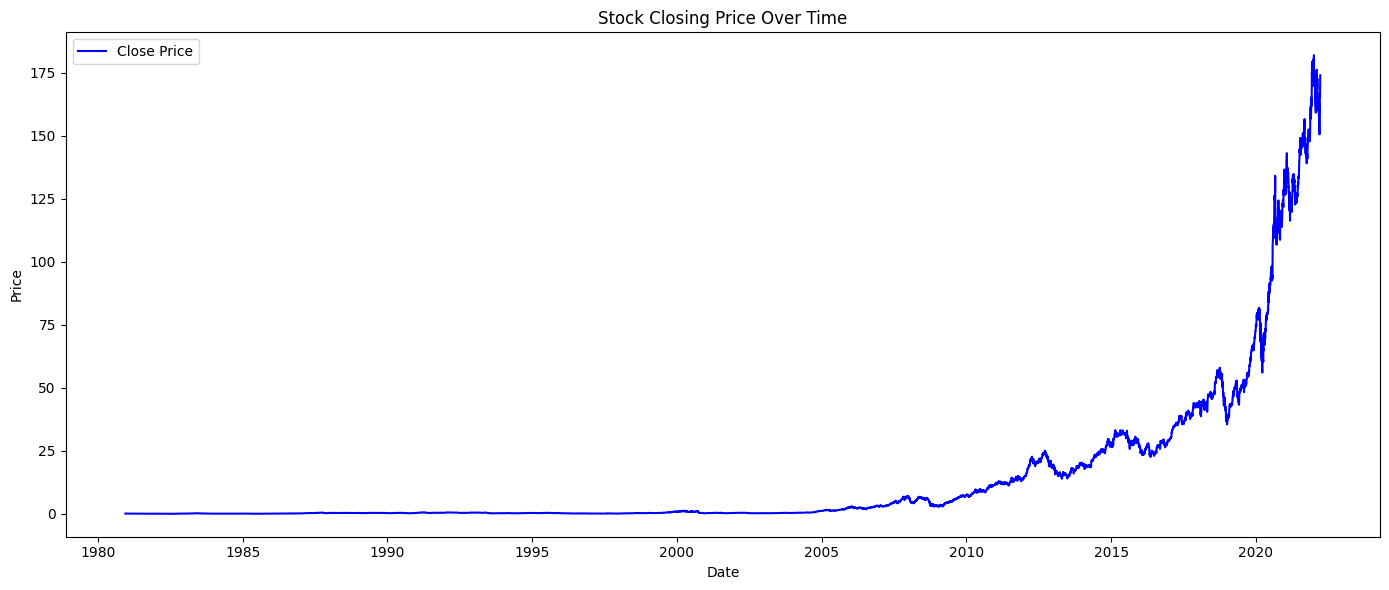

In [133]:
appleDF['Date'] = pd.to_datetime(appleDF['Date'])

plt.figure(figsize=(14, 6))
plt.plot(appleDF['Date'], appleDF['Close'], label='Close Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

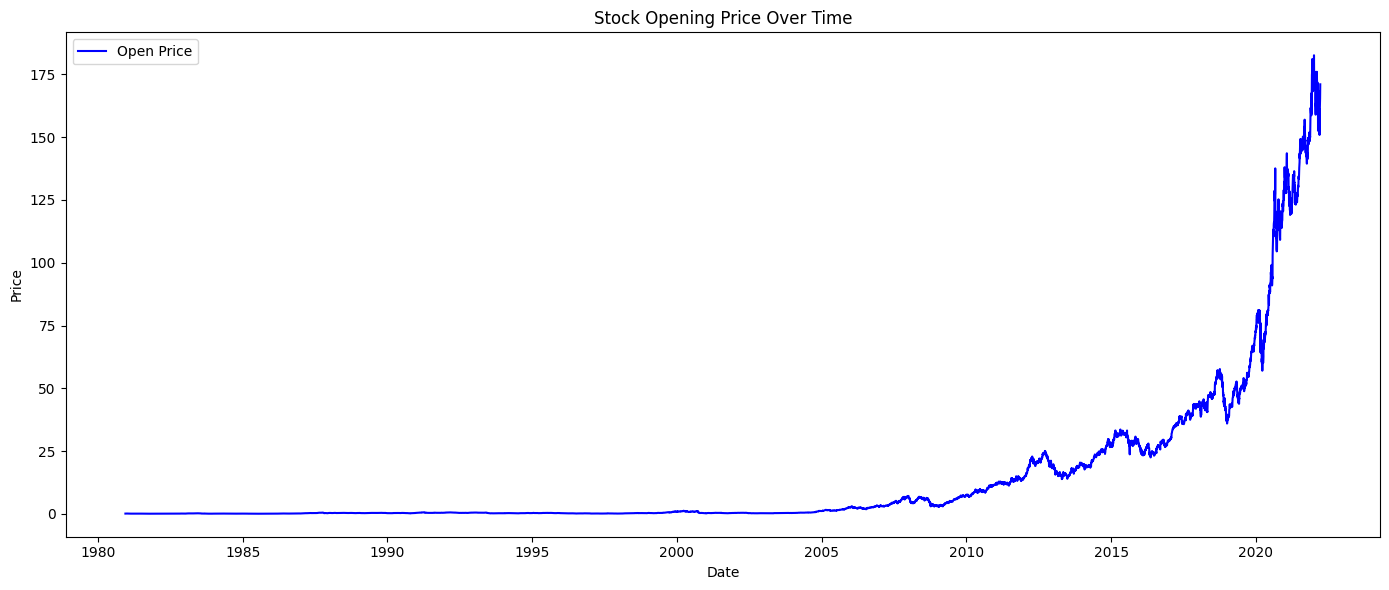

In [134]:
appleDF['Date'] = pd.to_datetime(appleDF['Date'])

plt.figure(figsize=(14, 6))
plt.plot(appleDF['Date'], appleDF['Open'], label='Open Price', color='blue')
plt.title('Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [135]:
correlation = appleDF['Open'].corr(appleDF['Close'])
print(f'Correlation between Apple Open and Close prices: {correlation:.4f}')

Correlation between Apple Open and Close prices: 0.9999


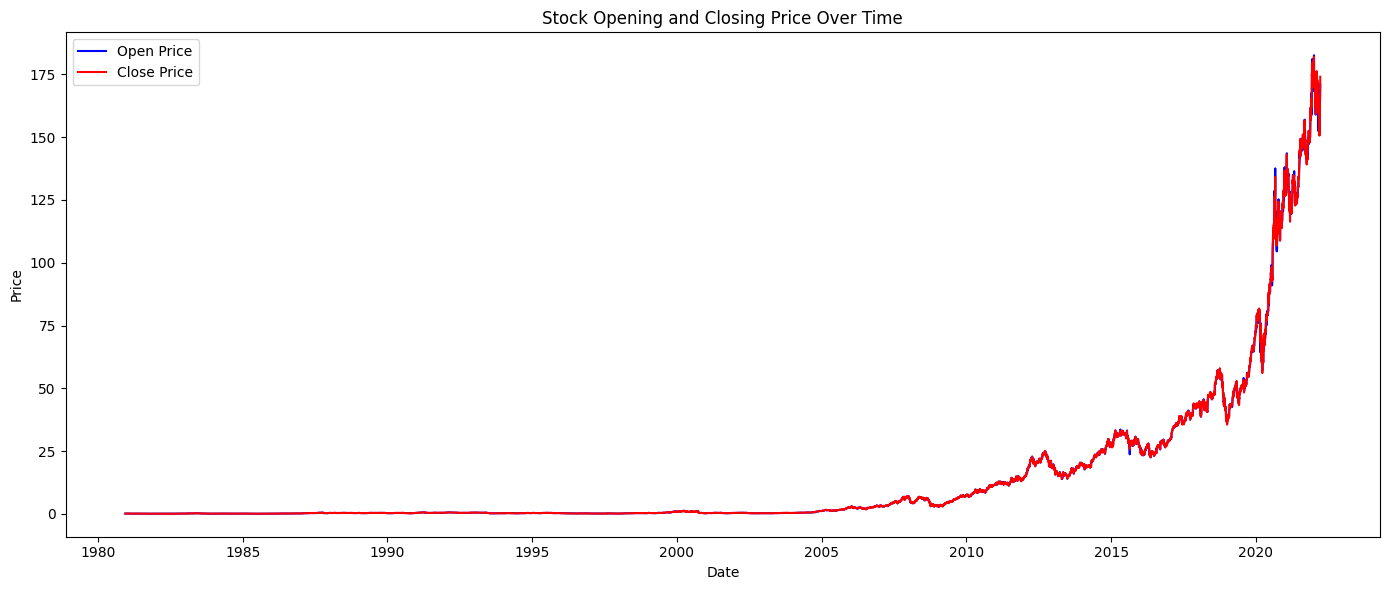

In [136]:
appleDF['Date'] = pd.to_datetime(appleDF['Date'])

plt.figure(figsize=(14, 6))
plt.plot(appleDF['Date'], appleDF['Open'], label='Open Price', color='blue')
plt.plot(appleDF['Date'], appleDF['Close'], label='Close Price', color='red')
plt.title('Stock Opening and Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [137]:
interestRateDF=interestRateDF.interpolate()
interestRateDF['Date'] = pd.to_datetime(interestRateDF[['Year', 'Month', 'Day']])

import pandas as pd
import matplotlib.pyplot as plt

# Convert dates
appleDF['Date'] = pd.to_datetime(appleDF['Date'])
interestRateDF['Date'] = pd.to_datetime(interestRateDF[['Year', 'Month', 'Day']])

# Merge Apple and Fed Rate data
df = pd.merge(appleDF[['Date', 'Open']], interestRateDF[['Date', 'Effective Federal Funds Rate']], on='Date', how='inner')

# Rolling correlation with a 60-day window
df['RollingCorr'] = df['Open'].rolling(window=60).corr(df['Effective Federal Funds Rate'])

In [138]:
# Shift Fed Rate forward by 30 days (i.e., see how past Fed Rate affects future Apple stock)
df['Lagged Rate'] = df['Effective Federal Funds Rate'].shift(30)

# Drop NaNs from shifting
df_lagged = df.dropna()

# Calculate correlation
correlation = df_lagged['Open'].corr(df_lagged['Lagged Rate'])
print(f"Lagged (30-day) correlation: {correlation}")

## This is a moderate to strong negative correlation between Apple’s stock price and the Federal Funds Rate from 30 days earlier.

Lagged (30-day) correlation: -0.6538579645233382


## INTC Stock Breakdown

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


intelDF= pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/INTC.csv')
intelDF.head() # print first 5 lines, starts at 1980
#intelDF.tail() # print last 5 lines, ends 2024

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.181500,0.184404,0.181500,0.181500,10924800,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.181500,0.182952,0.180048,0.180048,17068800,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.184404,0.187308,0.184404,0.184404,18508800,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.184403,0.186581,0.183678,0.183678,11174400,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.180048,0.180048,0.177143,0.177143,12172800,0.0,0.0


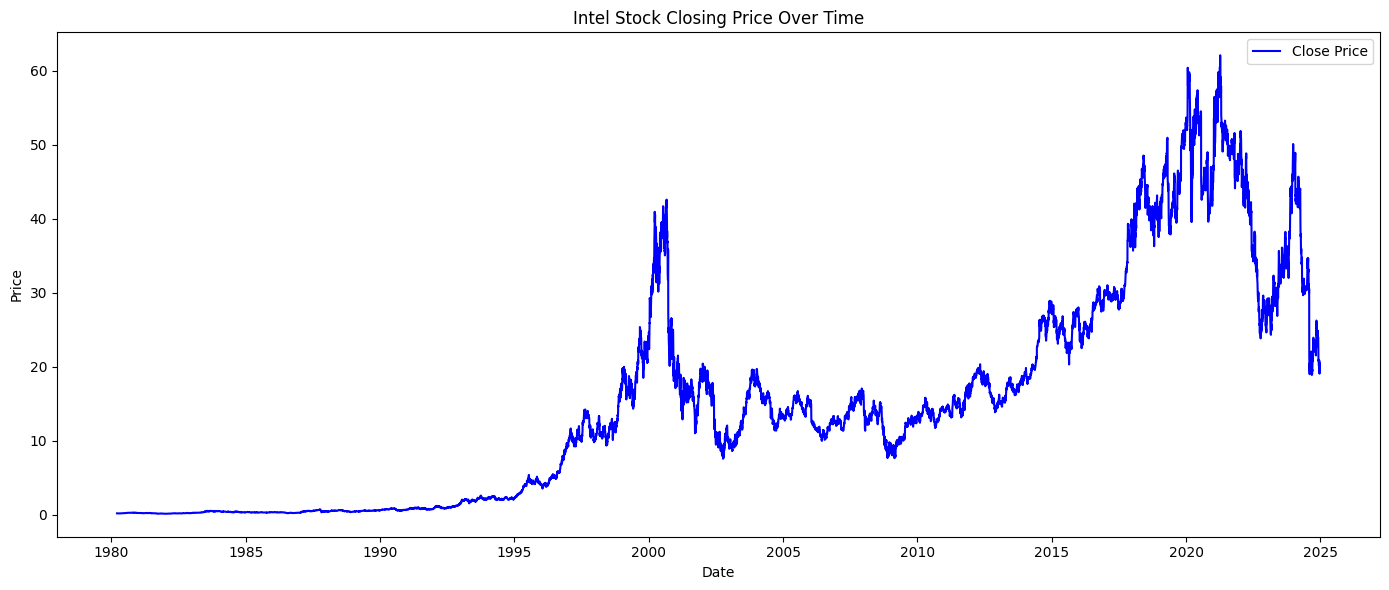

In [140]:
intelDF['Date']= pd.to_datetime(intelDF['Date'], utc=True) # converting to better dates

plt.figure(figsize=(14, 6)) # creating figure to plot close prices
plt.plot(intelDF['Date'], intelDF['Close'], label='Close Price', color='blue')
plt.title('Intel Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

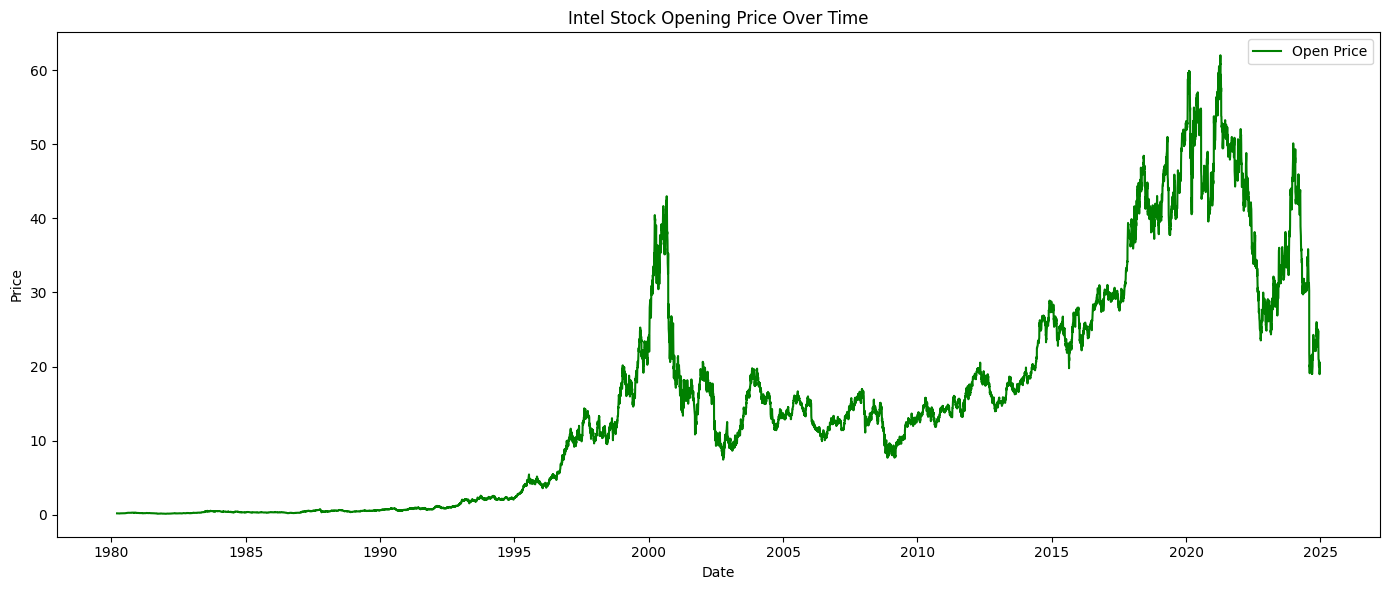

In [141]:
plt.figure(figsize=(14, 6)) # creating figure to plot open prices
plt.plot(intelDF['Date'], intelDF['Open'], label='Open Price', color='green')
plt.title('Intel Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

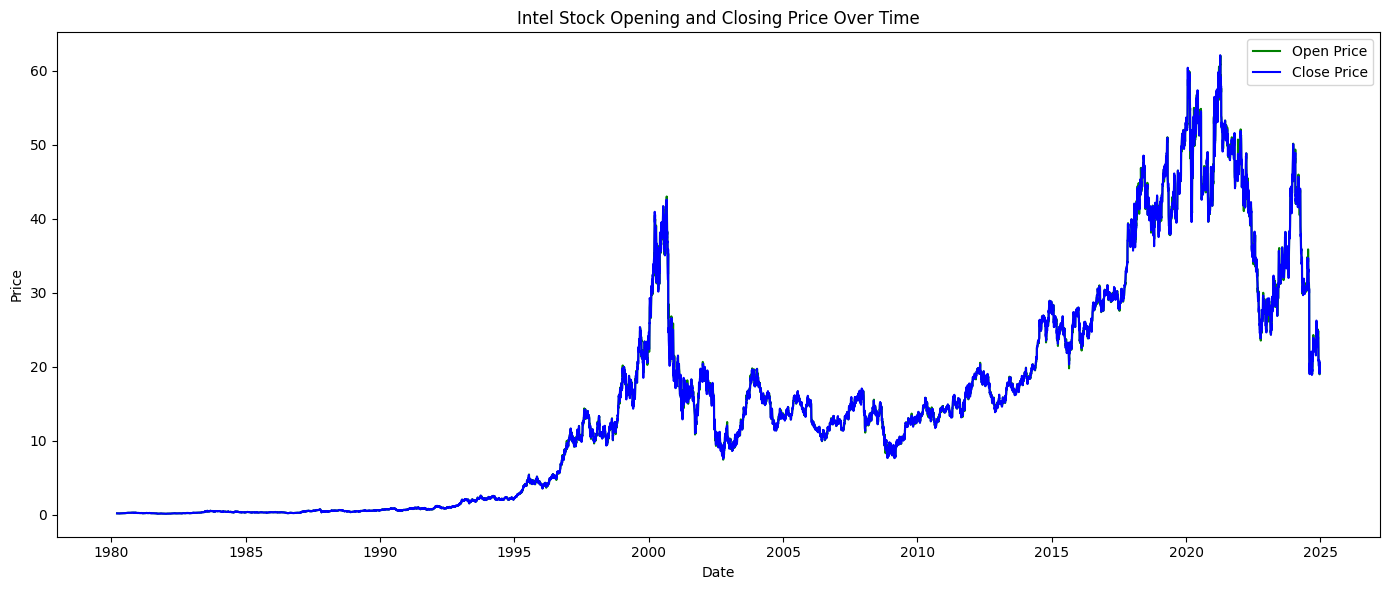

In [142]:
plt.figure(figsize=(14, 6)) # creating figure to compare close and open prices
plt.plot(intelDF['Date'], intelDF['Open'], label='Open Price', color='green')
plt.plot(intelDF['Date'], intelDF['Close'], label='Close Price', color='blue')
plt.title('Intel Stock Opening and Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [143]:
interestRateDF=interestRateDF.interpolate()
interestRateDF['Date'] = pd.to_datetime(interestRateDF[['Year', 'Month', 'Day']]) # convert to better date

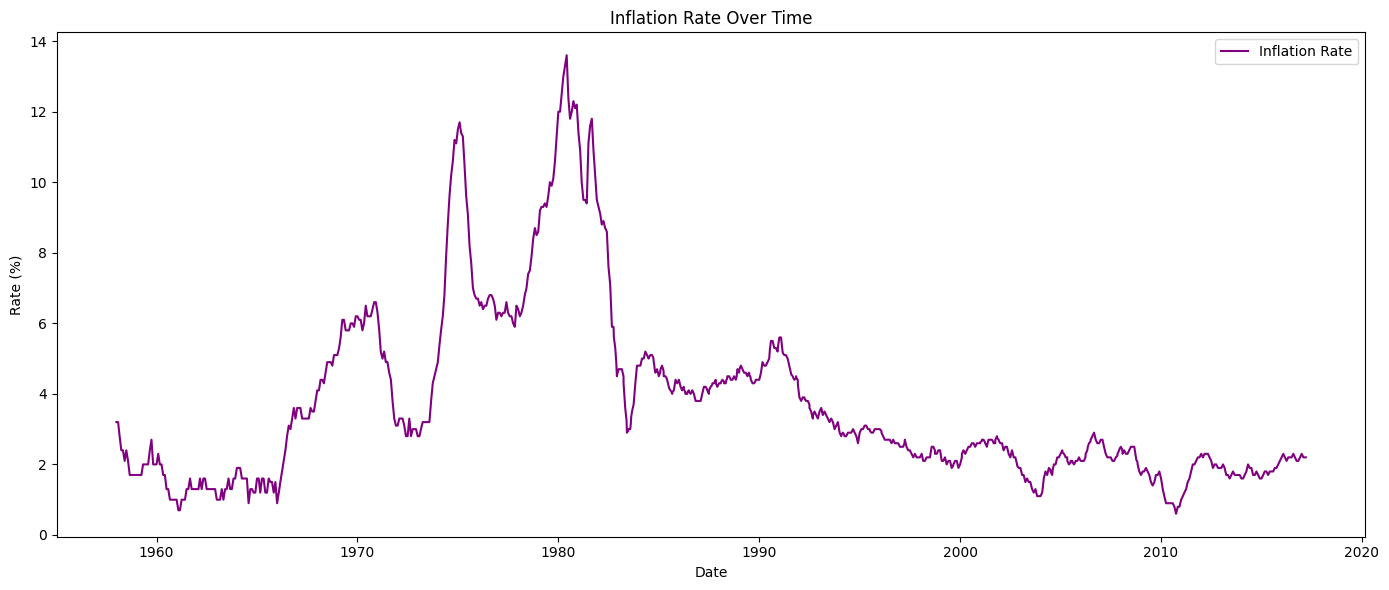

In [144]:
# plotting inflation rates
plt.figure(figsize=(14,6))
plt.plot(interestRateDF['Date'], interestRateDF['Inflation Rate'], label='Inflation Rate', color='purple')
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

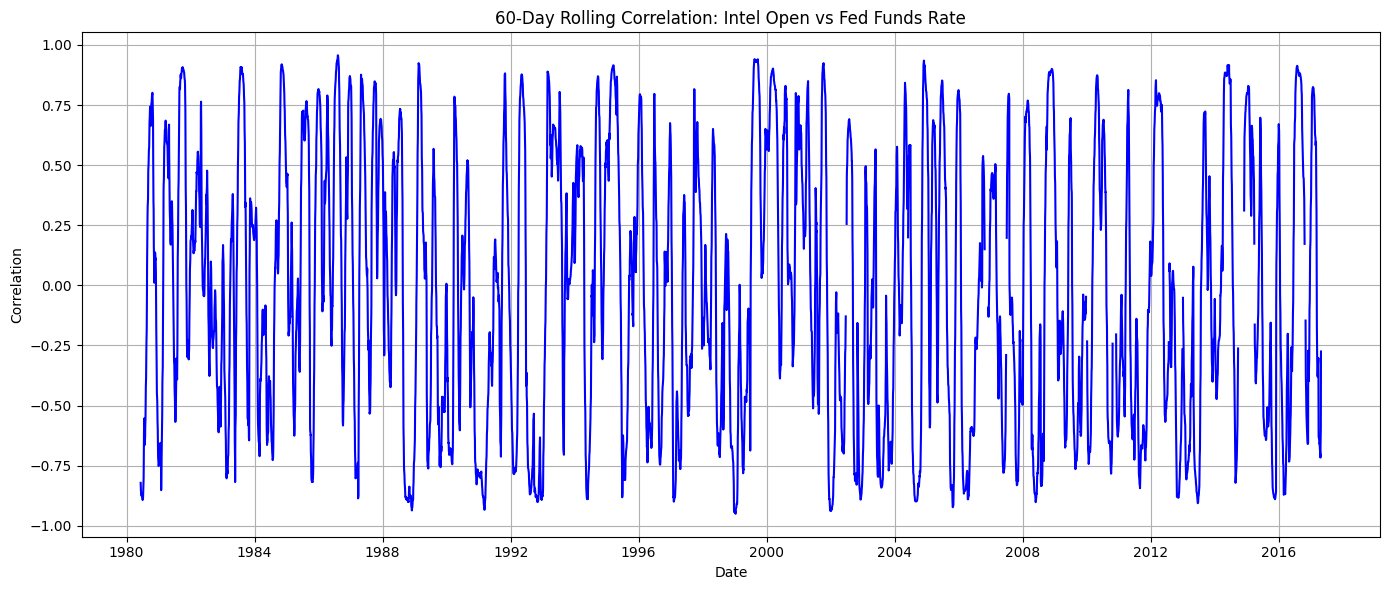

In [145]:
# Rolling Correlation of 60 days
intelDF = intelDF.sort_values('Date')
interestRateDF = interestRateDF.sort_values('Date')
intelDF['Date'] = intelDF['Date'].dt.tz_localize(None)
rollingDF2 = pd.merge_asof(intelDF[['Date', 'Open']], interestRateDF[['Date', 'Effective Federal Funds Rate']], on='Date')
rollingDF2['RollingCorr'] = rollingDF2['Open'].rolling(window=60).corr(rollingDF2['Effective Federal Funds Rate'])

plt.figure(figsize=(14,6))
plt.plot(rollingDF2['Date'], rollingDF2['RollingCorr'], color='blue')
plt.title('60-Day Rolling Correlation: Intel Open vs Fed Funds Rate')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [146]:
# Lagged Correlation (30 days)
rollingDF2['Lagged Rate'] = rollingDF2['Effective Federal Funds Rate'].shift(30)
rollingDF2_lagged = rollingDF2.dropna()

correlation2 = rollingDF2_lagged['Open'].corr(rollingDF2_lagged['Lagged Rate'])
print(f"Lagged (30-day) correlation: {correlation2}")


Lagged (30-day) correlation: -0.6212596368881346


#### There is a moderate to strong negative correlation between Federal funds rate and Intel's stock price 30 days later. This means, when interest rates go up, Intel stocks tend to go down after about a month (and vice versa). This suggests that monetary policy decisions like rate hikes could have a delayed negative impact on Intel's stock price

### Correlating companies to each other

In [147]:
correlation = intelDF['Open'].corr(msftDF['Open'])
print(f'Correlation between Intel Open and Microsoft Open prices: {correlation:.4f}')

Correlation between Intel Open and Microsoft Open prices: 0.7810


In [148]:
correlation = intelDF['Close'].corr(msftDF['Close'])
print(f'Correlation between Intel Close and Microsoft Close prices: {correlation:.4f}')

Correlation between Intel Close and Microsoft Close prices: 0.7816


In [149]:
correlation = intelDF['Open'].corr(appleDF['Open'])
print(f'Correlation between Intel Open and Apple Open prices: {correlation:.4f}')

Correlation between Intel Open and Apple Open prices: 0.8114


In [150]:
correlation = intelDF['Close'].corr(appleDF['Close'])
print(f'Correlation between Intel Close and Apple Close prices: {correlation:.4f}')

Correlation between Intel Close and Apple Close prices: 0.8116


In [151]:
correlation = intelDF['Open'].corr(sp500DF['Open'])
print(f'Correlation between Intel Open and S&P500 Open prices: {correlation:.4f}')

Correlation between Intel Open and S&P500 Open prices: 0.7134


In [152]:
correlation = intelDF['Close'].corr(sp500DF['Close'])
print(f'Correlation between Intel Close and S&P500 Close prices: {correlation:.4f}')

Correlation between Intel Close and S&P500 Close prices: 0.7135


## MSFT Stock Breakdown

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

msftDF = pd.read_csv('/content/drive/My Drive/AI4ALL Project Datasets/MSFT.csv')
msftDF.head() # starts 1986
# msftDF.tail() # ends 2025


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059827,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.061963,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063032,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061429,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060361,47894400


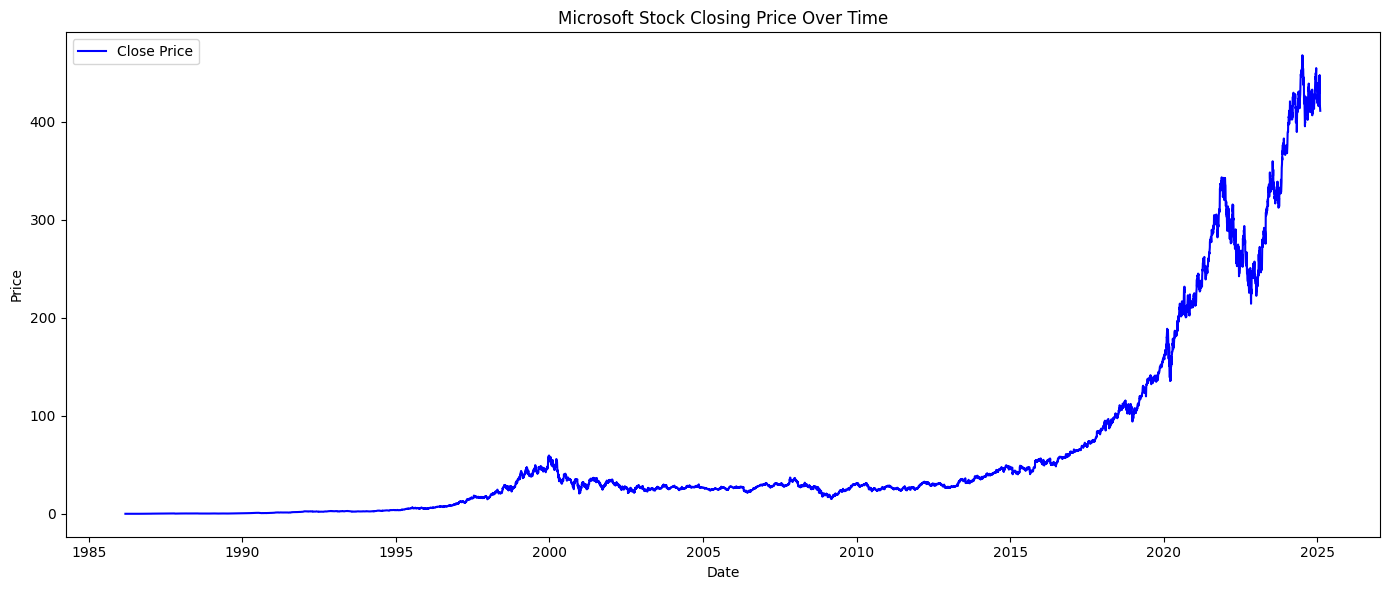

In [154]:
msftDF['Date'] = pd.to_datetime(msftDF['Date'], utc=True)
plt.figure(figsize=(14,6))
plt.plot(msftDF['Date'], msftDF['Close'], label = 'Close Price', color= 'blue')
plt.title('Microsoft Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

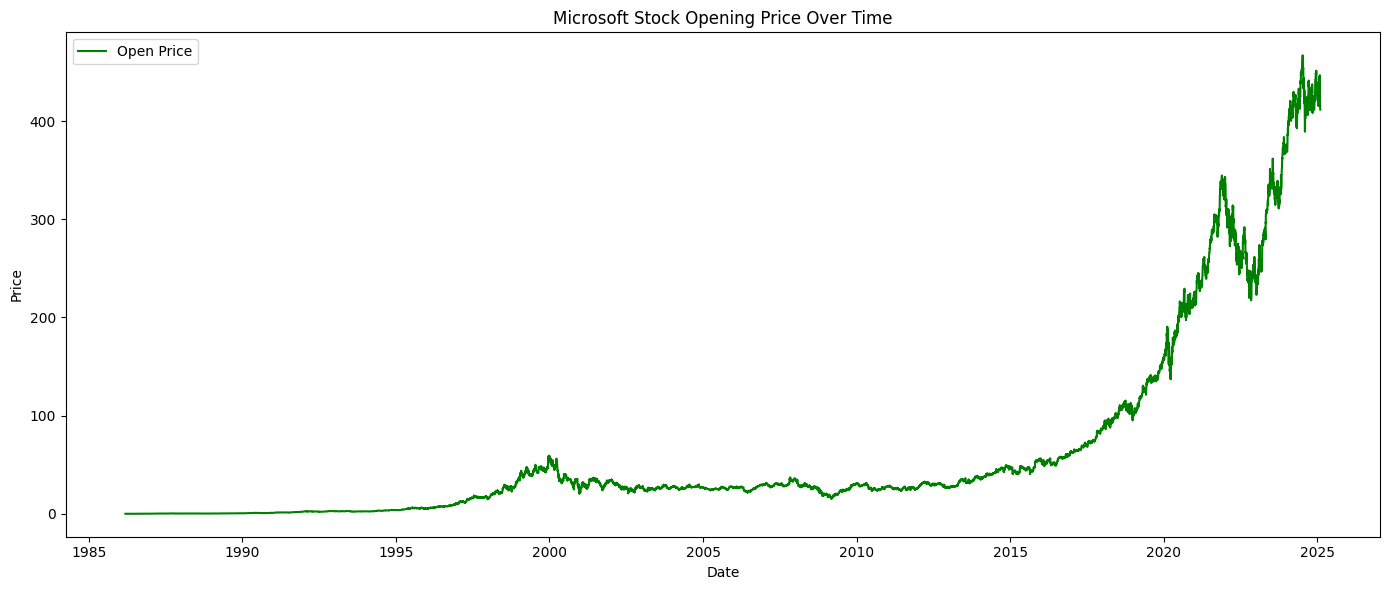

In [155]:
plt.figure(figsize=(14,6))
plt.plot(msftDF['Date'], msftDF['Open'], label= 'Open Price', color='green')
plt.title('Microsoft Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


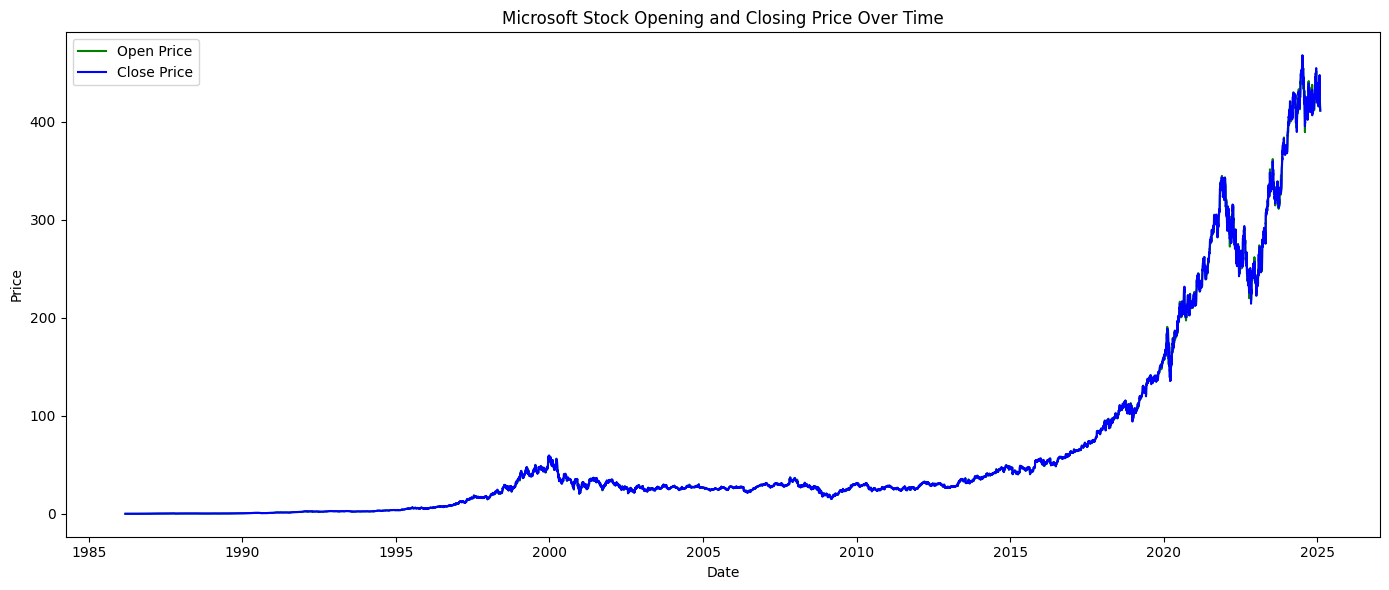

In [156]:
plt.figure(figsize=(14, 6)) # creating figure to compare close and open prices
plt.plot(msftDF['Date'], msftDF['Open'], label='Open Price', color='green')
plt.plot(msftDF['Date'], msftDF['Close'], label='Close Price', color='blue')
plt.title('Microsoft Stock Opening and Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [157]:
# Now comparing against economic factors
interestRateDF=interestRateDF.interpolate()
interestRateDF['Date'] = pd.to_datetime(interestRateDF[['Year', 'Month', 'Day']]) # convert to better date

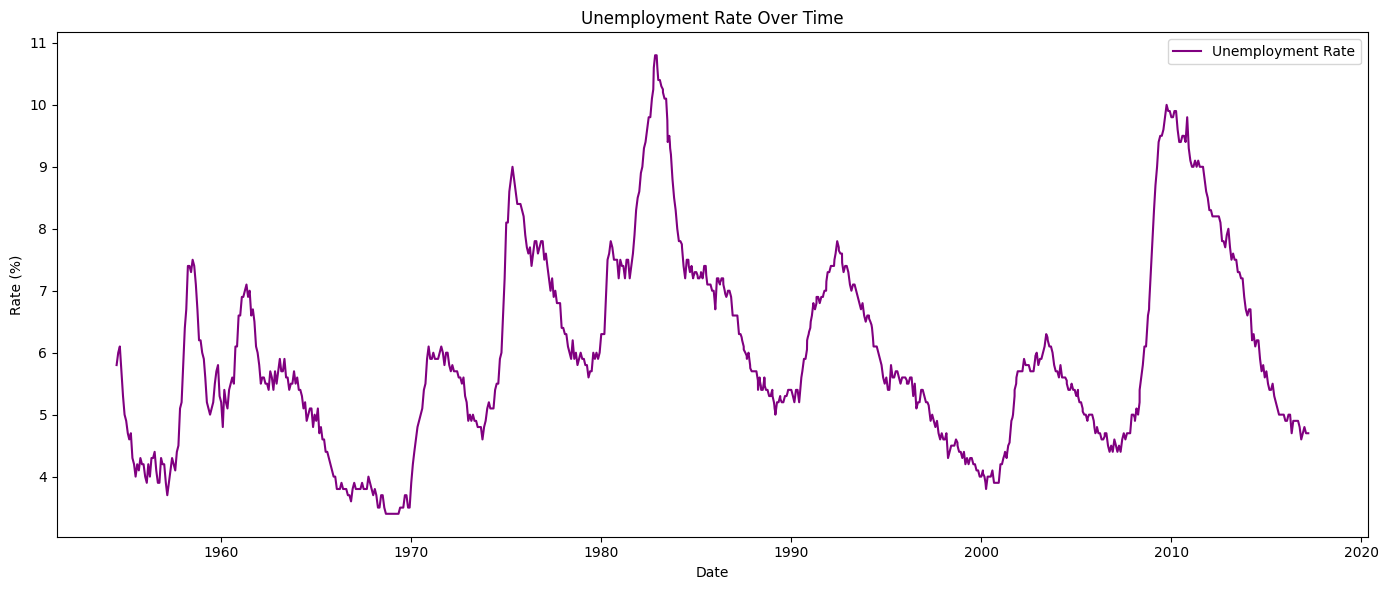

In [158]:
# plotting unemployment rates
plt.figure(figsize=(14,6))
plt.plot(interestRateDF['Date'], interestRateDF['Unemployment Rate'], label='Unemployment Rate', color='purple')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

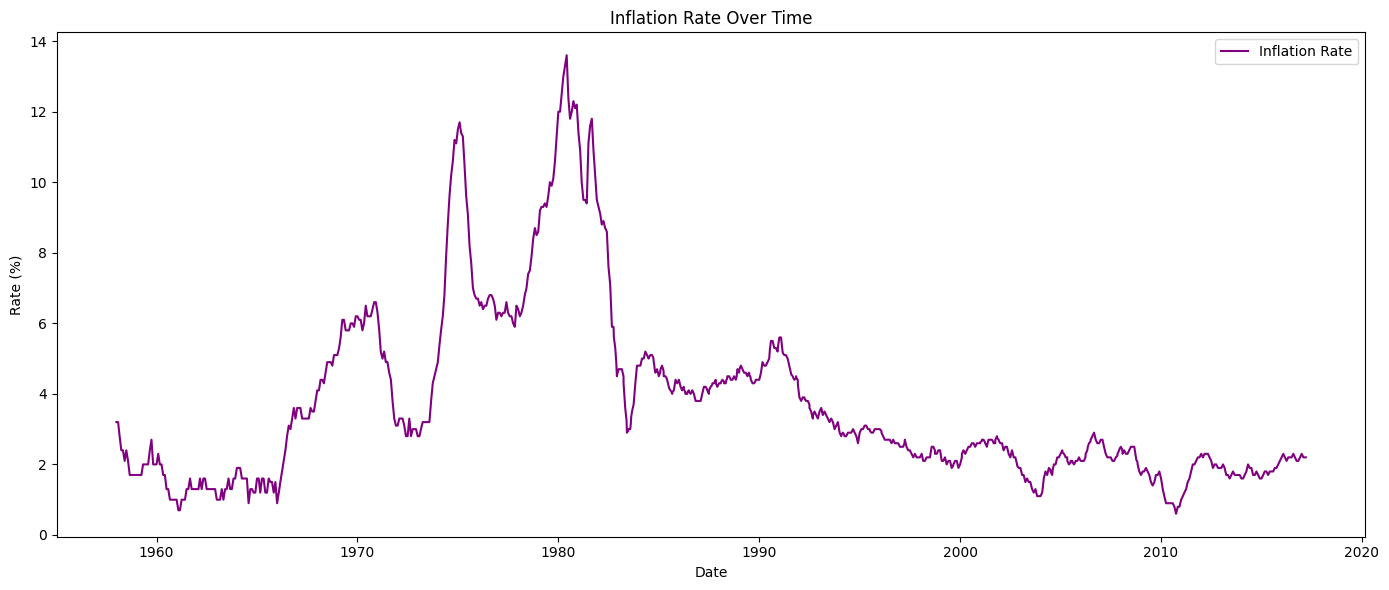

In [159]:
# plotting inflation rates
plt.figure(figsize=(14,6))
plt.plot(interestRateDF['Date'], interestRateDF['Inflation Rate'], label='Inflation Rate', color='purple')
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

In [160]:
# Merging and normalizing data
msftDF = msftDF.sort_values('Date')
interestRateDF = interestRateDF.sort_values('Date')

msftDF['Date'] = pd.to_datetime(msftDF['Date'])
msftDF['Date'] = msftDF['Date'].dt.tz_localize(None)

mergedDF3 = pd.merge_asof(msftDF[['Date', 'Open']], interestRateDF, on='Date')

# normalize to compare
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

mergedDF3['Open_norm'] = normalize(mergedDF3['Open'])
mergedDF3['InterestRate_norm'] = normalize(mergedDF3['Effective Federal Funds Rate'])
mergedDF3['GDP_norm'] = normalize(mergedDF3['Real GDP (Percent Change)'])
mergedDF3['Unemployment_norm'] = normalize(mergedDF3['Unemployment Rate'])
mergedDF3['Inflation_norm'] = normalize(mergedDF3['Inflation Rate'])

mergedDF3[['Date', 'Open_norm', 'InterestRate_norm', 'GDP_norm', 'Unemployment_norm', 'Inflation_norm']].head()

def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

mergedDF3['Open_norm'] = normalize(mergedDF3['Open'])
mergedDF3['InterestRate_norm'] = normalize(mergedDF3['Effective Federal Funds Rate'])
mergedDF3['GDP_norm'] = normalize(mergedDF3['Real GDP (Percent Change)'])
mergedDF3['Unemployment_norm'] = normalize(mergedDF3['Unemployment Rate'])
mergedDF3['Inflation_norm'] = normalize(mergedDF3['Inflation Rate'])

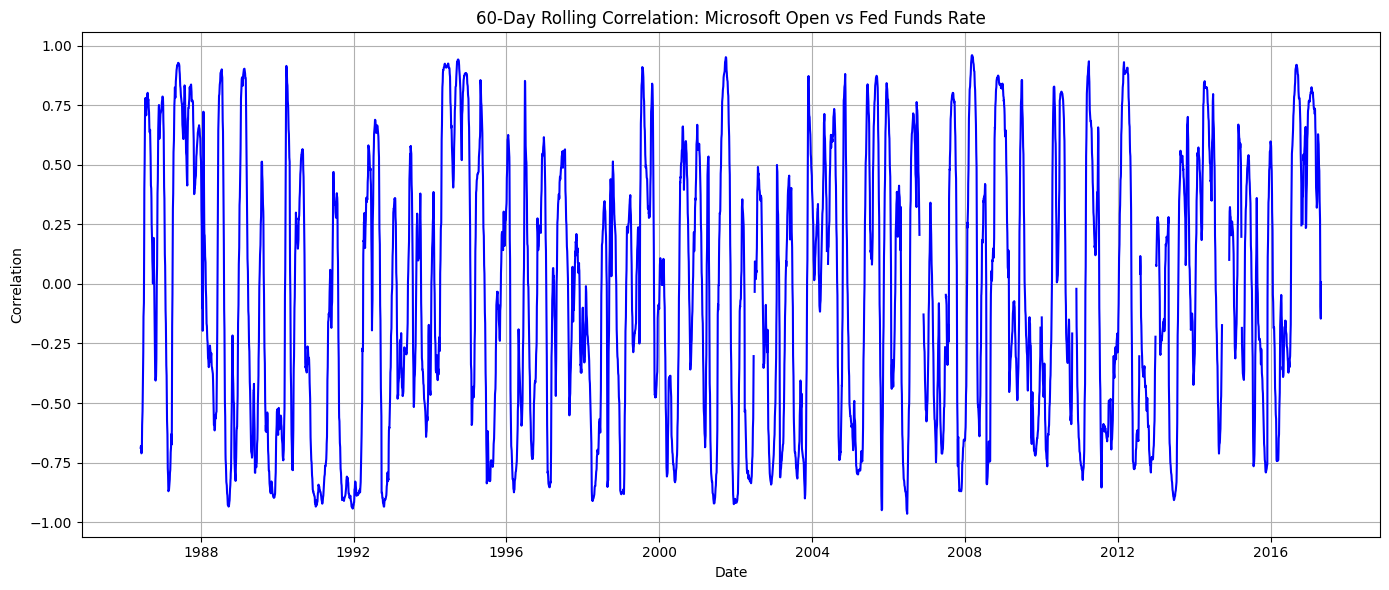

In [161]:
# Rolling Correlation of 60 days
msftDF = msftDF.sort_values('Date')
interestRateDF = interestRateDF.sort_values('Date')
msftDF['Date'] = msftDF['Date'].dt.tz_localize(None)
rollingDF3 = pd.merge_asof(msftDF[['Date', 'Open']], interestRateDF[['Date', 'Effective Federal Funds Rate']], on='Date')
rollingDF3['RollingCorr'] = rollingDF3['Open'].rolling(window=60).corr(rollingDF3['Effective Federal Funds Rate'])

plt.figure(figsize=(14,6))
plt.plot(rollingDF3['Date'], rollingDF3['RollingCorr'], color='blue')
plt.title('60-Day Rolling Correlation: Microsoft Open vs Fed Funds Rate')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [162]:
# Lagged Correlation (30 days)
rollingDF3['Lagged Rate'] = rollingDF3['Effective Federal Funds Rate'].shift(30)
rollingDF3_lagged = rollingDF3.dropna()

correlation3 = rollingDF3_lagged['Open'].corr(rollingDF3_lagged['Lagged Rate'])
print(f"Lagged (30-day) correlation: {correlation3}")

Lagged (30-day) correlation: -0.3920560447898803


### Correlations of other companies with Microsoft

In [163]:
correlation = msftDF['Open'].corr(appleDF['Open'])
print(f'Correlation between Microsoft Open and Apple Open prices: {correlation:.4f}')

Correlation between Microsoft Open and Apple Open prices: 0.9515


In [164]:
correlation = msftDF['Close'].corr(appleDF['Close'])
print(f'Correlation between Microsoft Close and Apple Close prices: {correlation:.4f}')

Correlation between Microsoft Close and Apple Close prices: 0.9517


In [165]:
correlation = msftDF['Open'].corr(intelDF['Open'])
print(f'Correlation between Microsoft Open and Intel Open prices: {correlation:.4f}')

Correlation between Microsoft Open and Intel Open prices: 0.7810


In [166]:
correlation = msftDF['Close'].corr(intelDF['Close'])
print(f'Correlation between Microsoft Close and Intel Close prices: {correlation:.4f}')

Correlation between Microsoft Close and Intel Close prices: 0.7816


In [167]:
correlation = msftDF['Open'].corr(sp500DF['Open'])
print(f'Correlation between Microsoft Open and S&P500 Open prices: {correlation:.4f}')

Correlation between Microsoft Open and S&P500 Open prices: 0.4975


In [168]:
correlation = msftDF['Close'].corr(sp500DF['Close'])
print(f'Correlation between Microsoft Close and S&P500 Close prices: {correlation:.4f}')

Correlation between Microsoft Close and S&P500 Close prices: 0.4973


## IBM Stock Breakdown

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ibmDF = pd.read_csv('/content/drive/My Drive/AI4ALL Project Datasets/IBM.csv')
ibmDF.head() # starts 1962
# ibmDF.tail() # ends 2024


,Date,Open,High,Low,Close,Volume
0,1962-01-02,1.530517,1.530517,1.513320,1.513320,407940
1,1962-01-03,1.513322,1.526550,1.513322,1.526550,305955
2,1962-01-04,1.526549,1.526549,1.510675,1.511336,274575
3,1962-01-05,1.509352,1.509352,1.478927,1.481573,384405
4,1962-01-08,1.480249,1.480249,1.441887,1.453792,572685


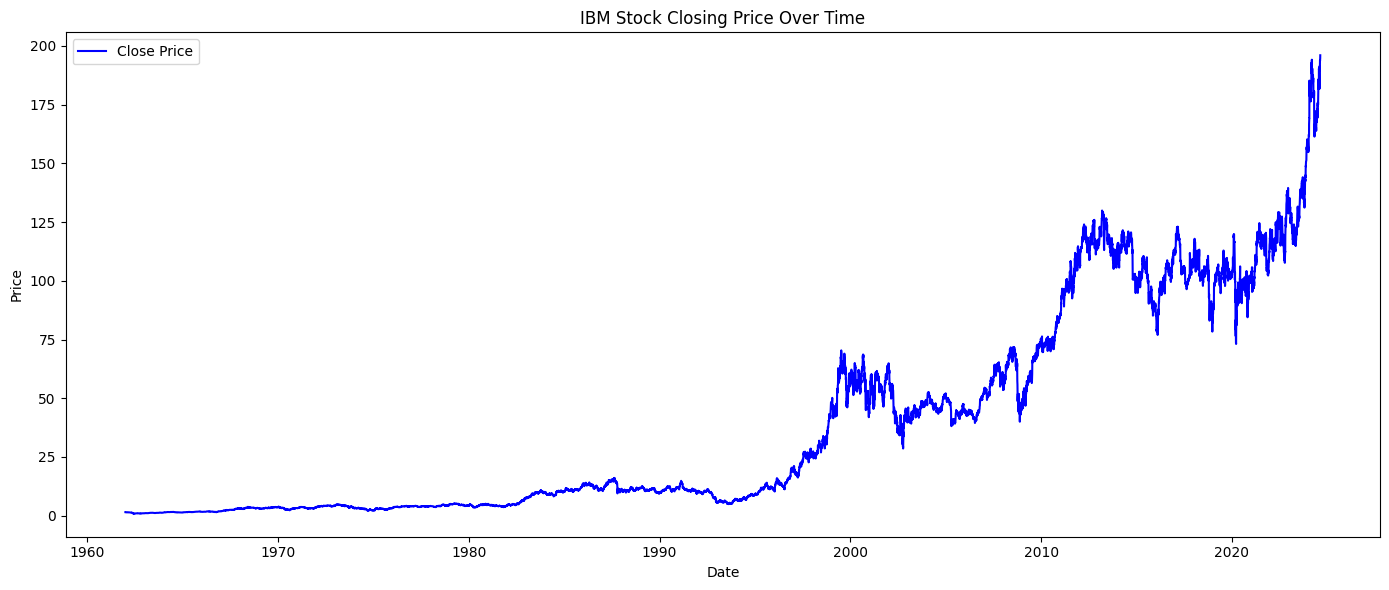

In [170]:
ibmDF['Date'] = pd.to_datetime(ibmDF['Date'], utc=True)
plt.figure(figsize=(14,6))
plt.plot(ibmDF['Date'], ibmDF['Close'], label = 'Close Price', color= 'blue')
plt.title('IBM Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

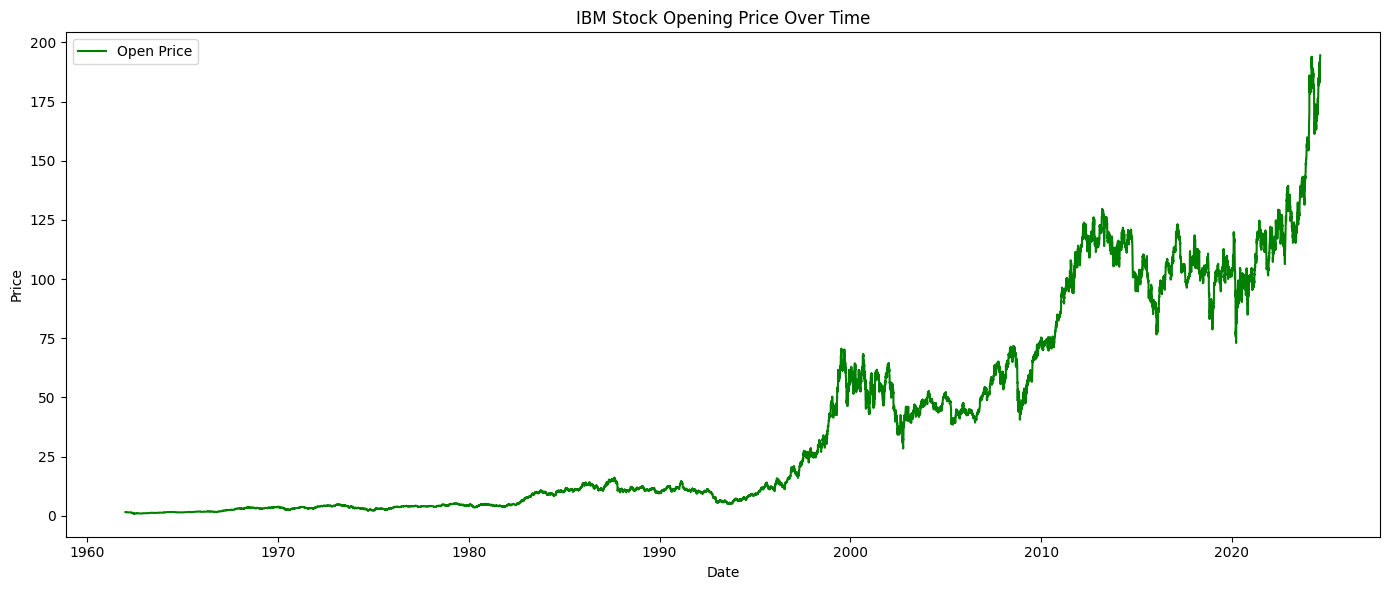

In [171]:
plt.figure(figsize=(14,6))
plt.plot(ibmDF['Date'], ibmDF['Open'], label= 'Open Price', color='green')
plt.title('IBM Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


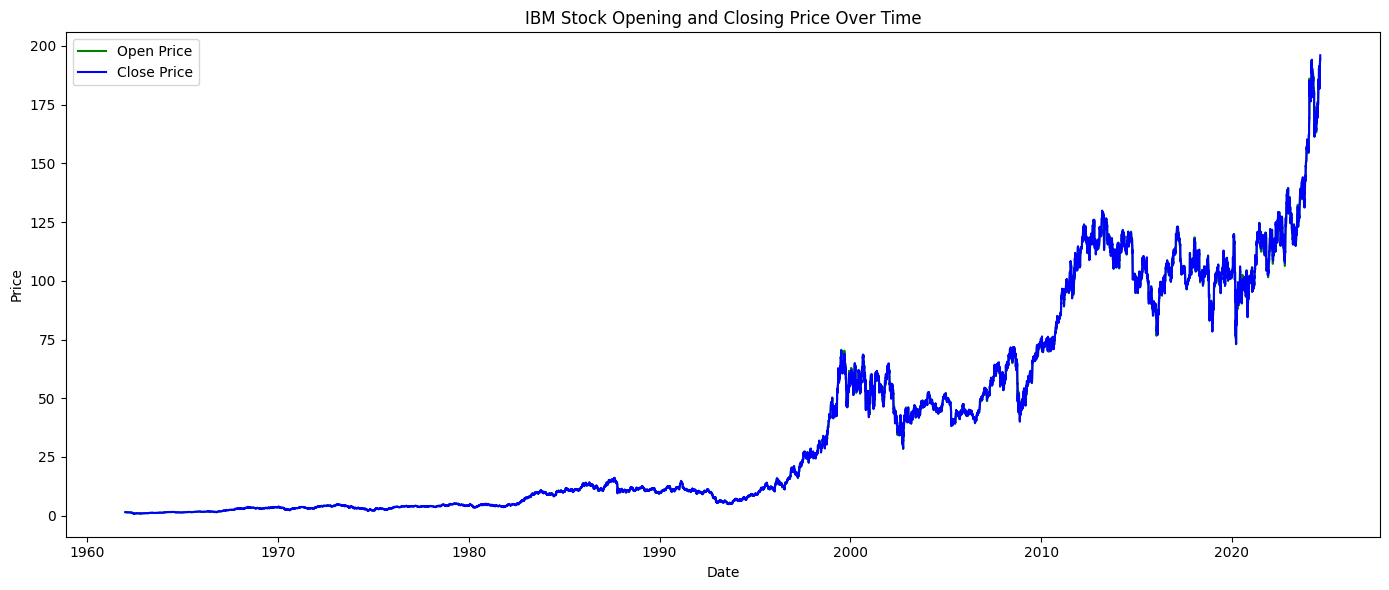

In [172]:
plt.figure(figsize=(14, 6)) # creating figure to compare close and open prices
plt.plot(ibmDF['Date'], ibmDF['Open'], label='Open Price', color='green')
plt.plot(ibmDF['Date'], ibmDF['Close'], label='Close Price', color='blue')
plt.title('IBM Stock Opening and Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [173]:
# Now comparing against economic factors
interestRateDF=interestRateDF.interpolate()
interestRateDF['Date'] = pd.to_datetime(interestRateDF[['Year', 'Month', 'Day']]) # convert to better date

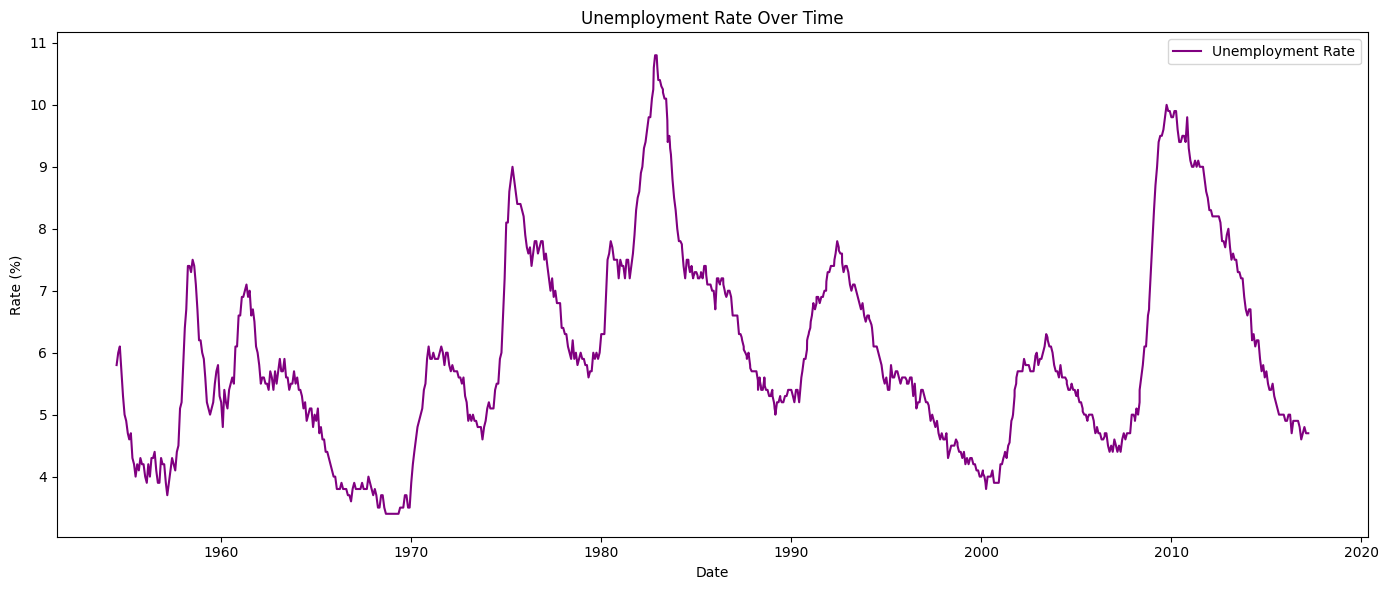

In [174]:
# plotting unemployment rates
plt.figure(figsize=(14,6))
plt.plot(interestRateDF['Date'], interestRateDF['Unemployment Rate'], label='Unemployment Rate', color='purple')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

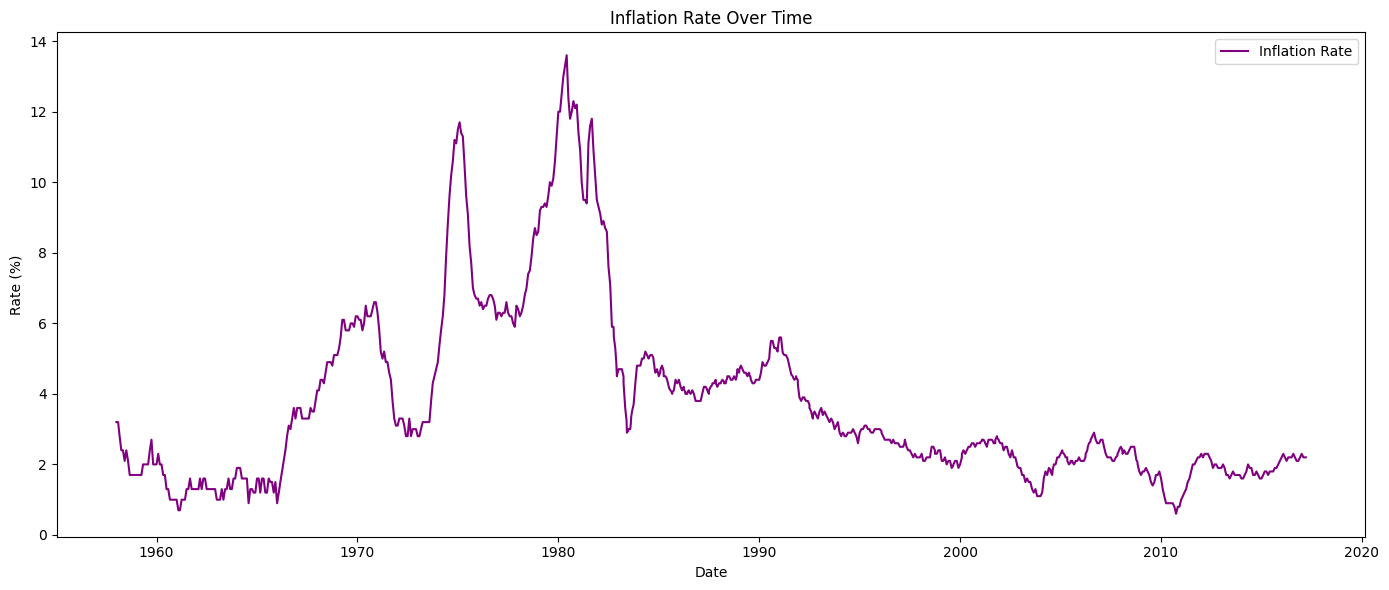

In [175]:
# plotting inflation rates
plt.figure(figsize=(14,6))
plt.plot(interestRateDF['Date'], interestRateDF['Inflation Rate'], label='Inflation Rate', color='purple')
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

        Date  Open_norm  InterestRate_norm  GDP_norm  Unemployment_norm  \
0 1962-01-02   0.003719           0.109301  0.631579           0.324324   
1 1962-01-03   0.003630           0.109301  0.631579           0.324324   
2 1962-01-04   0.003699           0.109301  0.631579           0.324324   
3 1962-01-05   0.003610           0.109301  0.631579           0.324324   
4 1962-01-08   0.003460           0.109301  0.631579           0.324324   

   Inflation_norm  
0        0.053846  
1        0.053846  
2        0.053846  
3        0.053846  
4        0.053846  


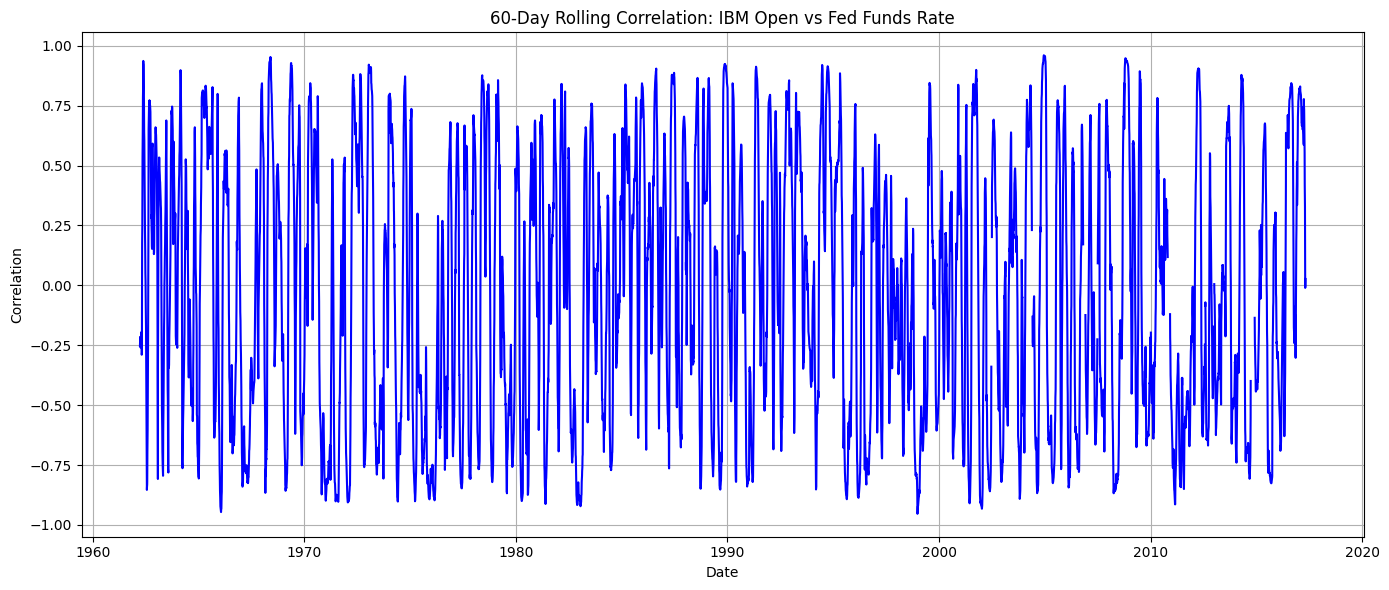

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure data is sorted and datetime is clean
ibmDF = ibmDF.sort_values('Date')
interestRateDF = interestRateDF.sort_values('Date')

ibmDF['Date'] = pd.to_datetime(ibmDF['Date']).dt.tz_localize(None)

# Merge IBM stock data with macroeconomic indicators using asof
mergedDF_ibm = pd.merge_asof(ibmDF[['Date', 'Open']], interestRateDF, on='Date')

# Normalize function
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize IBM Open price and economic indicators
mergedDF_ibm['Open_norm'] = normalize(mergedDF_ibm['Open'])
mergedDF_ibm['InterestRate_norm'] = normalize(mergedDF_ibm['Effective Federal Funds Rate'])
mergedDF_ibm['GDP_norm'] = normalize(mergedDF_ibm['Real GDP (Percent Change)'])
mergedDF_ibm['Unemployment_norm'] = normalize(mergedDF_ibm['Unemployment Rate'])
mergedDF_ibm['Inflation_norm'] = normalize(mergedDF_ibm['Inflation Rate'])

# Preview normalized data
print(mergedDF_ibm[['Date', 'Open_norm', 'InterestRate_norm', 'GDP_norm', 'Unemployment_norm', 'Inflation_norm']].head())

# Rolling 60-day correlation between IBM Open and Effective Federal Funds Rate
rollingDF_ibm = pd.merge_asof(
    ibmDF[['Date', 'Open']],
    interestRateDF[['Date', 'Effective Federal Funds Rate']],
    on='Date'
)
rollingDF_ibm['RollingCorr'] = rollingDF_ibm['Open'].rolling(window=60).corr(
    rollingDF_ibm['Effective Federal Funds Rate']
)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(rollingDF_ibm['Date'], rollingDF_ibm['RollingCorr'], color='blue')
plt.title('60-Day Rolling Correlation: IBM Open vs Fed Funds Rate')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [177]:
# Lagged Correlation (30 days)
rollingDF_ibm['Lagged Rate'] = rollingDF_ibm['Effective Federal Funds Rate'].shift(30)
rollingDF_ibm_lagged = rollingDF_ibm.dropna()

correlation4 = rollingDF_ibm_lagged['Open'].corr(rollingDF_ibm_lagged['Lagged Rate'])
print(f"Lagged (30-day) correlation: {correlation4}")

Lagged (30-day) correlation: -0.6595686868070517


### Correlations of companies with IBM

In [178]:
correlation = ibmDF['Open'].corr(appleDF['Open'])
print(f'Correlation between IBM Open and Apple Open prices: {correlation:.4f}')

Correlation between IBM Open and Apple Open prices: 0.7831


In [179]:
correlation = ibmDF['Close'].corr(appleDF['Close'])
print(f'Correlation between IBM Close and Apple Close prices: {correlation:.4f}')

Correlation between IBM Close and Apple Close prices: 0.7835


In [180]:
correlation = ibmDF['Open'].corr(intelDF['Open'])
print(f'Correlation between IBM Open and Intel Open prices: {correlation:.4f}')

Correlation between IBM Open and Intel Open prices: 0.8600


In [181]:
correlation = ibmDF['Close'].corr(intelDF['Close'])
print(f'Correlation between IBM Close and Intel Close prices: {correlation:.4f}')

Correlation between IBM Close and Intel Close prices: 0.8601


In [182]:
correlation = ibmDF['Open'].corr(sp500DF['Open'])
print(f'Correlation between IBM Open and S&P500 Open prices: {correlation:.4f}')

Correlation between IBM Open and S&P500 Open prices: 0.8672


In [183]:
correlation = ibmDF['Close'].corr(sp500DF['Close'])
print(f'Correlation between IBM Close and S&P500 Close prices: {correlation:.4f}')

Correlation between IBM Close and S&P500 Close prices: 0.8671


# 2) Correlation Analysis

## Comparison of Lagged (30-day) Correlations







1.   Apple (-0.6538579645233382)
2.   Intel (-0.6212596368881346)
3.   Microsoft (-0.3920560447898803)
4.   IBM (-0.3920560447898803)




### Apple has the strongest negative correlation, which could be attributed to the fact that it is a massive consumer tech company (which is highly exposed to global demand and interest-sensitive purchasing)

## Correlation of Company Stocks with S&P 500

In [184]:
sp500DF['Date'] = pd.to_datetime(sp500DF['Date'], utc=True).dt.tz_localize(None)
sp500DF = sp500DF.sort_values('Date')

In [185]:
def compareToSP500(stockDF, name):
  stockDF['Date'] = pd.to_datetime(stockDF['Date'], utc=True).dt.tz_localize(None)
  stockDF = stockDF.sort_values('Date')

  # Merging with SP500
  mergedDF5 = pd.merge_asof(stockDF[['Date', 'Open']], sp500DF[['Date', 'Close']], on='Date')
  mergedDF5= mergedDF5.dropna()

  # Normalizing for comparison
  def normalize(series):
      return (series - series.min()) / (series.max() - series.min())

  mergedDF5['Stock_norm'] = normalize(mergedDF5['Open'])
  mergedDF5['SP500_norm'] = normalize(mergedDF5['Close'])

  # Plotting
  plt.figure(figsize=(14, 6))
  plt.plot(mergedDF5['Date'], mergedDF5['Stock_norm'], label=f'{name} (Normalized)', color='blue')
  plt.plot(mergedDF5['Date'], mergedDF5['SP500_norm'], label='S&P 500 (Normalized)', color='gray')
  plt.title(f'{name} vs S&P 500 (Normalized)')
  plt.xlabel('Date')
  plt.ylabel('Normalized Price')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  # Correlation
  correlation = mergedDF5['Stock_norm'].corr(mergedDF5['SP500_norm'])
  print(f"Correlation between {name} and S&P 500: {correlation:.3f}")

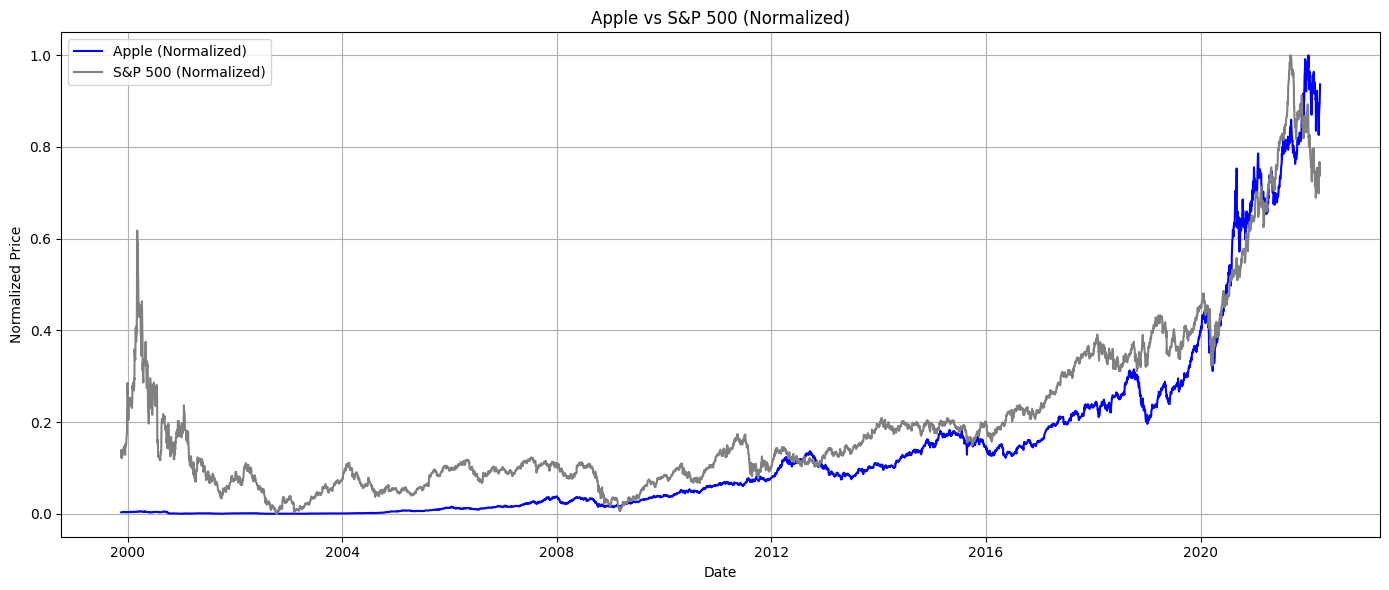

Correlation between Apple and S&P 500: 0.948


In [186]:
# Comparing Apple to S&P 500
compareToSP500(appleDF, "Apple")

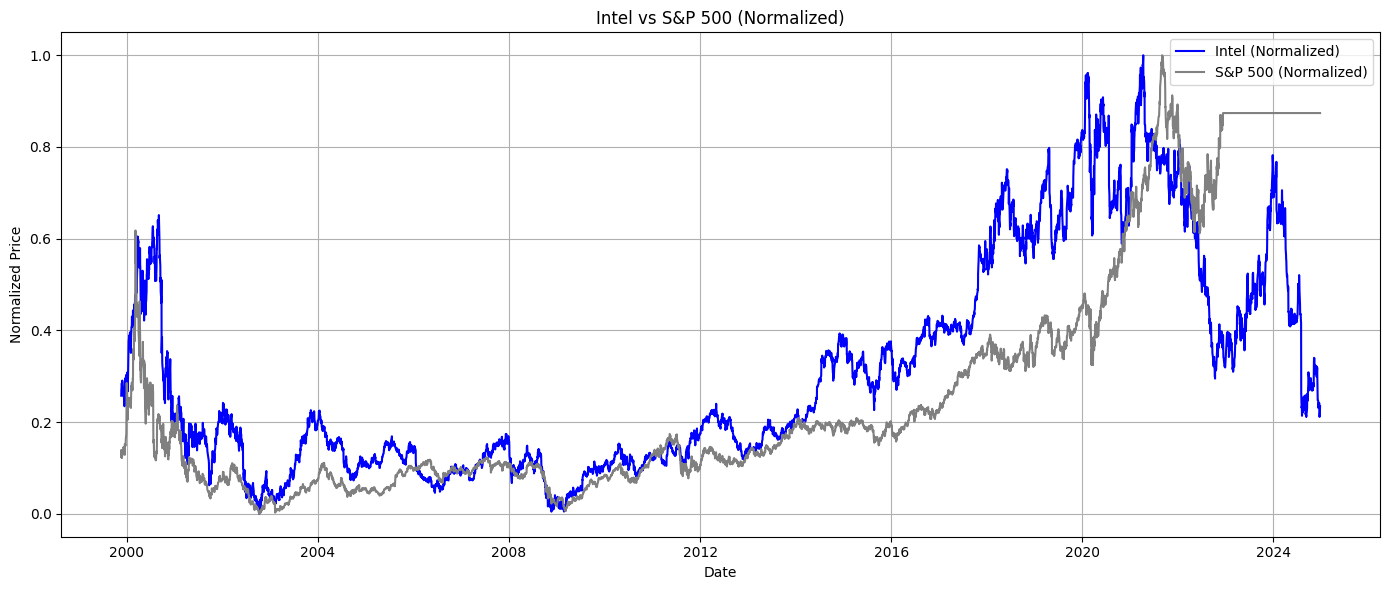

Correlation between Intel and S&P 500: 0.730


In [187]:
# Comparing Intel to S&P 500
compareToSP500(intelDF, "Intel")

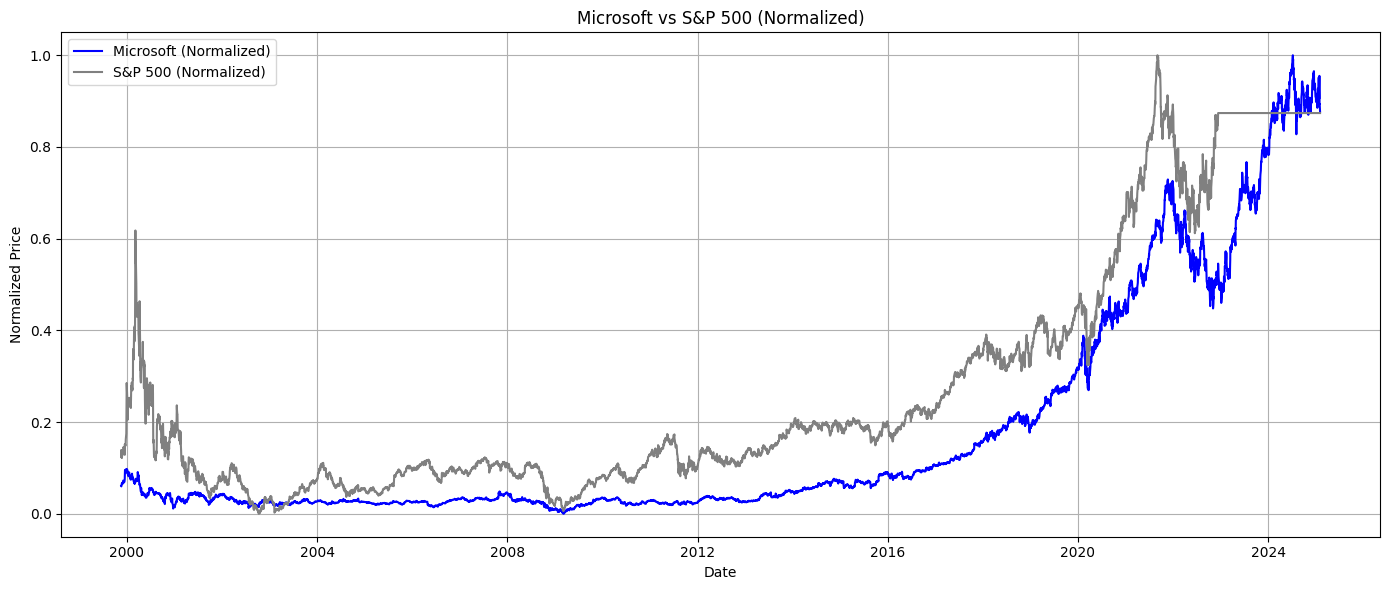

Correlation between Microsoft and S&P 500: 0.962


In [188]:
# Comparing Microsoft to S&P 500
compareToSP500(msftDF, "Microsoft")

## Comparison of company correlations with S&P500
1. Microsoft (0.962)
2. Apple (0.948)
3. Intel (0.730)

A higher correlation means that the company is closely correlated with the S&P 500. This suggests that a company with a higher correlation is very market-sensitive and less likely to act independently.

A lower (but still positive) correlation suggests that the stock is more independent and may be affected more by company-specific events. This could mean more more volatility or less predictability based on the overall market.

## Correlations of Companies with each other

## Company Opening Correlations


In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_company_prices_multi(df_dict, price_types=['Open']):
    merged_df = None

    for company, df in df_dict.items():
        temp_cols = ['Date'] + price_types
        temp_df = df[temp_cols].copy()
        temp_df = temp_df.rename(columns={ptype: f"{company}_{ptype}" for ptype in price_types})

        if merged_df is None:
            merged_df = temp_df
        else:
            merged_df = pd.merge(merged_df, temp_df, on='Date', how='outer')  # Changed to outer join

    merged_df.sort_values('Date', inplace=True)
    merged_df.interpolate(method='linear', inplace=True)  # Fill in missing values
    merged_df.dropna(inplace=True)

    price_columns = [col for col in merged_df.columns if col != 'Date']
    return merged_df[price_columns].corr()

                Apple_Open  Intel_Open  Microsoft_Open  IBM_Open
Apple_Open        1.000000    0.687179        0.969840  0.729753
Intel_Open        0.687179    1.000000        0.703948  0.770119
Microsoft_Open    0.969840    0.703948        1.000000  0.744553
IBM_Open          0.729753    0.770119        0.744553  1.000000


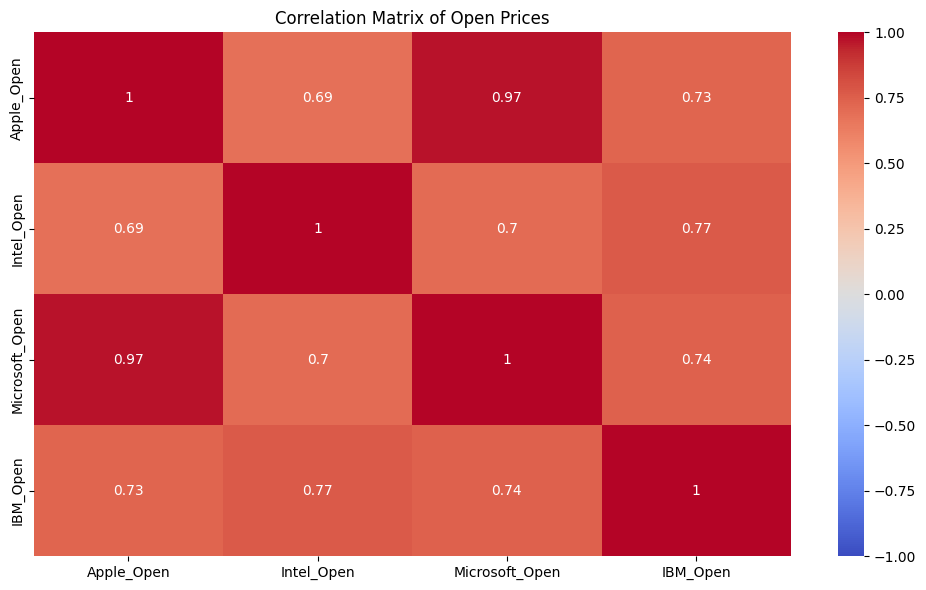

In [190]:
df_dict = {
    'Apple': appleDF,
    'Intel': intelDF,
    'Microsoft': msftDF,
    'IBM': ibmDF
}

correlation_open = compare_company_prices_multi(df_dict, price_types=['Open'])
print(correlation_open)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_open, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Open Prices')
plt.tight_layout()
plt.show()

### Comparison of Company Opens

1. Apple & Microsoft — 0.970
2. Intel & IBM — 0.770
3. Microsoft & IBM — 0.745
4. Apple & IBM — 0.730
5. Microsoft & Intel — 0.704
6. Apple & Intel — 0.687

All four companies show strong positive correlations in their opening prices, meaning their stocks tend to begin the trading day moving in similar directions. Apple and Microsoft are the most closely aligned, with the highest correlation, indicating nearly identical opening price behavior. Intel and IBM also exhibit a strong connection, followed closely by Microsoft and IBM. Apple and Intel have the weakest correlation in the group, though it remains significant. These results suggest that while all four companies are influenced by common market trends, Apple and Microsoft are the most tightly linked at market open.

## Company Closing Correlations










In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compare Close across multiple companies to compute pairwise correlations
def compare_company_prices_outer(df_dict, price_type='Close'):
    merged_df = None

    for company, df in df_dict.items():
        temp_df = df[['Date', price_type]].copy()
        temp_df = temp_df.rename(columns={price_type: f"{company}_{price_type}"})
        if merged_df is None:
            merged_df = temp_df
        else:
            merged_df = pd.merge(merged_df, temp_df, on='Date', how='outer')

    merged_df.sort_values('Date', inplace=True)
    merged_df.interpolate(method='linear', inplace=True)
    merged_df.dropna(inplace=True)

    return merged_df.drop(columns='Date').corr()

                 Apple_Close  Intel_Close  Microsoft_Close  IBM_Close
Apple_Close         1.000000     0.683215         0.970087   0.729153
Intel_Close         0.683215     1.000000         0.703673   0.769154
Microsoft_Close     0.970087     0.703673         1.000000   0.744991
IBM_Close           0.729153     0.769154         0.744991   1.000000


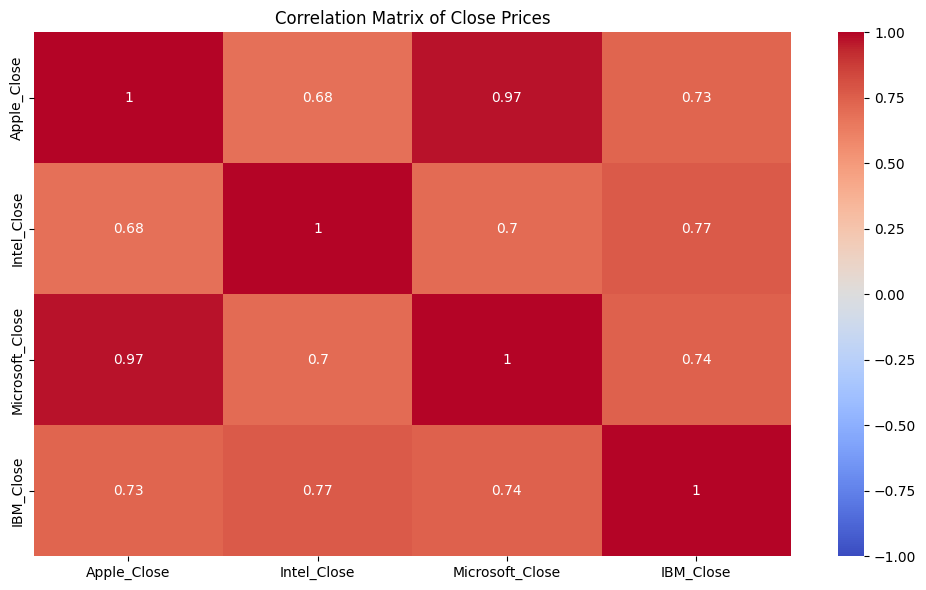

In [192]:
df_dict = {
    'Apple': appleDF,
    'Intel': intelDF,
    'Microsoft': msftDF,
    'IBM': ibmDF
}

correlation_matrix = compare_company_prices_outer(df_dict, price_type='Close')
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Close Prices')
plt.tight_layout()
plt.show()

### Comparison of Company Closes

1. Apple & Microsoft — 0.970
2. Intel & IBM — 0.769
3. Microsoft & IBM — 0.745
4. Apple & IBM — 0.729
5. Microsoft & Intel — 0.704
6. Apple & Intel — 0.683

All four companies demonstrate strong positive correlations in their closing prices, indicating that their stocks tend to move in the same direction by the end of the trading day. Apple and Microsoft once again have the strongest correlation, reflecting closely aligned price behavior throughout the day. Intel and IBM show a strong connection as well, followed by Microsoft and IBM. Apple and Intel have the weakest closing correlation in the group, though it remains substantial. These findings reinforce the idea that while all companies are shaped by broader market forces, Apple and Microsoft maintain the tightest relationship in how their stock prices close.

## Correlations of Companies with each other (Lagged)

In [193]:
import pandas as pd

def lagged_correlation(df1, df2, days=30):
    df1 = df1[['Date', 'Open']].copy().sort_values('Date')
    df2 = df2[['Date', 'Open']].copy().sort_values('Date')

    df2 = df2.copy()
    df2['Open'] = df2['Open'].shift(days)

    # Merge on Date
    merged = pd.merge(df1, df2, on='Date', suffixes=('_df1', '_df2'))
    merged.dropna(inplace=True)

    if not merged.empty:
        return merged['Open_df1'].corr(merged['Open_df2'])
    else:
        return None

companies = {
    'Apple': appleDF,
    'Intel': intelDF,
    'Microsoft': msftDF,
    'IBM': ibmDF
}

lagged_matrix = pd.DataFrame(index=companies.keys(), columns=companies.keys())

for base_name, base_df in companies.items():
    for lagged_name, lagged_df in companies.items():
        try:
            corr = lagged_correlation(base_df, lagged_df, days=30)
            lagged_matrix.loc[base_name, lagged_name] = round(corr, 4) if corr is not None else "N/A"
        except Exception as e:
            lagged_matrix.loc[base_name, lagged_name] = f"Err"

print("30-Day Lagged Correlation Matrix (Column company leads):")
display(lagged_matrix)

30-Day Lagged Correlation Matrix (Column company leads):


,Apple,Intel,Microsoft,IBM
Apple,0.9944,N/A,0.9699,0.6211
Intel,N/A,0.9856,N/A,N/A
Microsoft,0.9657,N/A,0.9964,0.705
IBM,0.6217,N/A,0.7138,0.9947


/tmp/ipython-input-194-1588378889.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lagged_matrix_numeric = lagged_matrix.replace("N/A", np.nan)


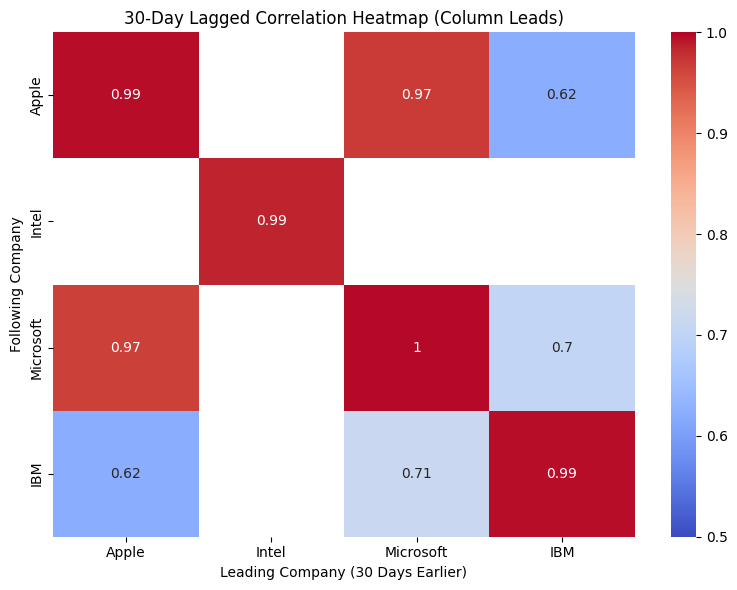

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lagged_matrix_numeric = lagged_matrix.replace("N/A", np.nan)
lagged_matrix_numeric = lagged_matrix_numeric.infer_objects(copy=False).astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(lagged_matrix_numeric, annot=True, cmap='coolwarm', vmin=0.5, vmax=1.0)
plt.title('30-Day Lagged Correlation Heatmap (Column Leads)')
plt.xlabel('Leading Company (30 Days Earlier)')
plt.ylabel('Following Company')
plt.tight_layout()
plt.show()

#### The 30-day lagged correlation analysis reveals strong temporal relationships between several major tech stocks, indicating how the movement of one company's stock may influence another over time. Apple and Microsoft exhibit the strongest mutual lagged correlation, with values of 0.9699 and 0.9657 respectively, suggesting their stock prices tend to move closely together even with a one-month delay. IBM also shows a moderate delayed influence on Microsoft (0.7138) and vice versa (0.7050), highlighting some interdependence between these two companies. In contrast, most of the lagged correlations involving Intel are unavailable, likely due to differences in available data ranges or gaps in overlapping timeframes. Overall, the findings suggest that Apple and Microsoft are the most closely linked in both immediate and delayed stock movement, while IBM maintains moderate influence and Intel may behave more independently or requires further data cleaning to evaluate effectively.

## Trying a longer lag

60-Day Lagged Correlation Matrix (Column company leads):


/tmp/ipython-input-195-1447069239.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lag_60_numeric = lag_60_matrix.replace("N/A", np.nan)


,Apple,Intel,Microsoft,IBM
Apple,0.9905,NaN,0.9672,0.6196
Intel,NaN,0.9738,NaN,NaN
Microsoft,0.9635,NaN,0.9936,0.6988
IBM,0.6251,NaN,0.7129,0.9907


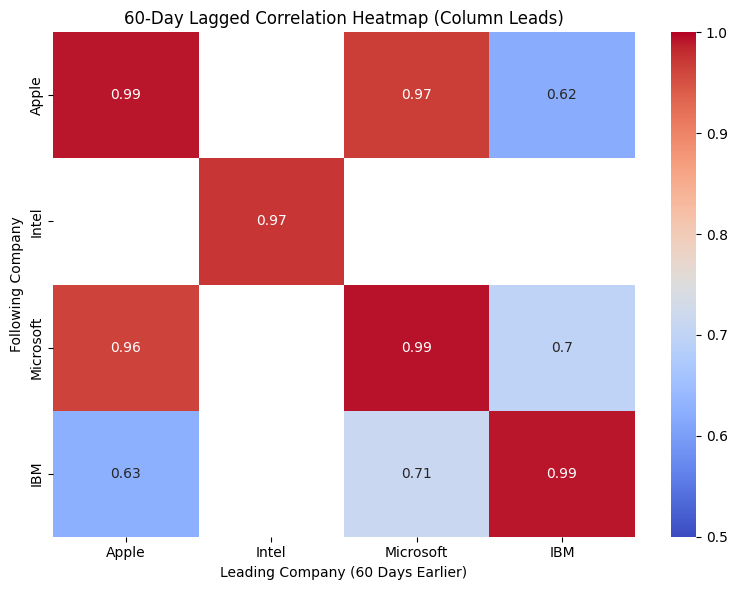

In [195]:
# Trying 60 days
lag_60_matrix = pd.DataFrame(index=companies.keys(), columns=companies.keys())

for base_name, base_df in companies.items():
    for lagged_name, lagged_df in companies.items():
        try:
            corr = lagged_correlation(base_df, lagged_df, days=60)
            lag_60_matrix.loc[base_name, lagged_name] = round(corr, 4) if corr is not None else "N/A"
        except Exception as e:
            lag_60_matrix.loc[base_name, lagged_name] = "Err"

# Prepare for plotting
lag_60_numeric = lag_60_matrix.replace("N/A", np.nan)
lag_60_numeric = lag_60_numeric.infer_objects(copy=False).astype(float)

print("60-Day Lagged Correlation Matrix (Column company leads):")
display(lag_60_numeric)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(lag_60_numeric, annot=True, cmap='coolwarm', vmin=0.5, vmax=1.0)
plt.title('60-Day Lagged Correlation Heatmap (Column Leads)')
plt.xlabel('Leading Company (60 Days Earlier)')
plt.ylabel('Following Company')
plt.tight_layout()
plt.show()

#### The 60-day lagged correlation matrix supports earlier findings from the 30-day lag analysis. Apple and Microsoft continue to exhibit the strongest mutual lagged correlation, with values above 0.96, indicating sustained influence on each other’s stock performance over two months. IBM shows moderate influence on Microsoft (0.7129) and vice versa (0.6988), consistent with their roles in similar enterprise technology markets. Intel remains underrepresented in the matrix due to data limitations, highlighting a need for further preprocessing or alignment. Overall, the similarity in patterns between the 30-day and 60-day lags suggests that most stock movements among these companies are influenced within the first month, with diminishing correlation beyond that window.

## Trying a shorter lag


14-Day Lagged Correlation Matrix (Column company leads):


/tmp/ipython-input-196-2259172348.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lag_14_numeric = lag_14_matrix.replace("N/A", np.nan)


,Apple,Intel,Microsoft,IBM
Apple,0.9974,NaN,0.9706,0.6216
Intel,NaN,0.9929,NaN,NaN
Microsoft,0.9683,NaN,0.9980,0.7099
IBM,0.6216,NaN,0.7146,0.9974


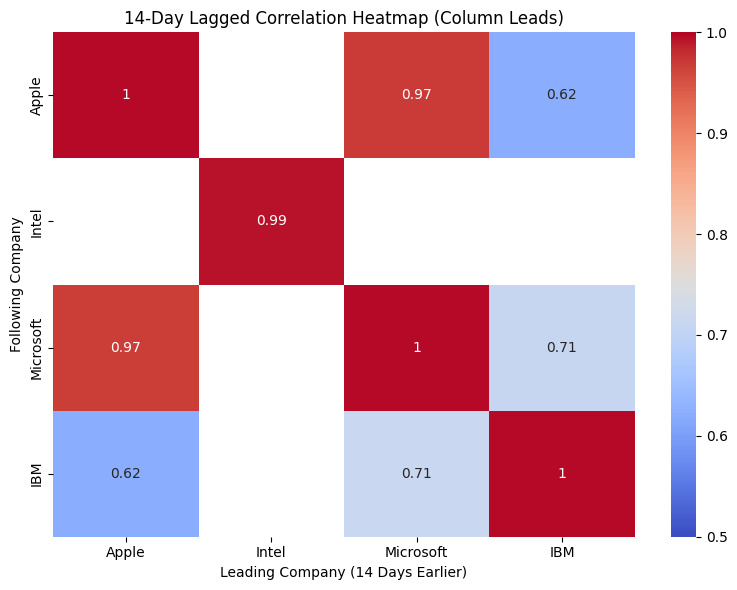

In [196]:
lag_14_matrix = pd.DataFrame(index=companies.keys(), columns=companies.keys())

for base_name, base_df in companies.items():
    for lagged_name, lagged_df in companies.items():
        try:
            corr = lagged_correlation(base_df, lagged_df, days=14)
            lag_14_matrix.loc[base_name, lagged_name] = round(corr, 4) if corr is not None else "N/A"
        except Exception as e:
            lag_14_matrix.loc[base_name, lagged_name] = "Err"

lag_14_numeric = lag_14_matrix.replace("N/A", np.nan)
lag_14_numeric = lag_14_numeric.infer_objects(copy=False).astype(float)

print("14-Day Lagged Correlation Matrix (Column company leads):")
display(lag_14_numeric)

plt.figure(figsize=(8, 6))
sns.heatmap(lag_14_numeric, annot=True, cmap='coolwarm', vmin=0.5, vmax=1.0)
plt.title('14-Day Lagged Correlation Heatmap (Column Leads)')
plt.xlabel('Leading Company (14 Days Earlier)')
plt.ylabel('Following Company')
plt.tight_layout()
plt.show()

#### The 14-day lagged correlation analysis reveals even stronger relationships between key tech companies than those observed at longer time intervals. Apple and Microsoft maintain the highest mutual influence, with lagged correlations of 0.9706 and 0.9683 respectively, indicating that shifts in one company's stock price are closely mirrored by the other within just two weeks. IBM also demonstrates a consistent delayed relationship with Microsoft, with correlations around 0.71 in both directions. These values are slightly higher than those from the 30- and 60-day lag analyses, suggesting that inter-company stock movements are most responsive within a shorter time frame. Once again, Intel's correlations are missing, likely due to misaligned or insufficient overlapping data after the lag shift. Overall, the results support the idea that the stock prices of Apple, Microsoft, and IBM are closely intertwined and that market reactions tend to manifest within 14 days.

## Overall Summary

The lagged correlation analysis examined how the stock prices of Apple, Microsoft, Intel, and IBM respond to each other over time, using 14-day, 30-day, and 60-day lags. Across all intervals, Apple and Microsoft consistently showed the strongest mutual lagged correlations, with values exceeding 0.96, indicating a tight and responsive relationship between their stock movements. IBM also demonstrated moderate delayed influence on Microsoft, with correlations above 0.70 at each lag. Notably, the correlations were strongest at the 14-day lag and gradually declined at 30 and 60 days, suggesting that the most significant inter-company influences occur within a two-week window. Intel’s lagged correlations were consistently unavailable, likely due to data alignment issues following the lag shift. Overall, the analysis highlights how closely certain tech stocks track each other over short time horizons, offering insight into the timing and strength of market responses within the sector.

# 3) Predictive Modeling

## Model Building (Training Phase)

In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import ta

# --- Labeling function with 0.5% threshold ---
def generate_labels(df, column='Close', days_ahead=5, threshold=0.005):
    df['FuturePrice'] = df[column].shift(-days_ahead)
    df['Return'] = (df['FuturePrice'] - df[column]) / df[column]
    df['Action'] = df['Return'].apply(lambda x: 1 if x > threshold else (-1 if x < -threshold else 0))
    return df

# --- Feature engineering with volume features ---
def generate_features(df):
    df['Close_Lag1'] = df['Close'].shift(1)
    df['Close_Lag2'] = df['Close'].shift(2)
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['Momentum_5'] = df['Close'] - df['Close'].shift(5)
    df['Momentum_10'] = df['Close'] - df['Close'].shift(10)
    df['Daily_Return'] = df['Close'].pct_change()
    df['Volume_Lag1'] = df['Volume'].shift(1)
    df['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume']).on_balance_volume()
    return df

# --- Model training ---
def build_model(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = generate_labels(df)
    df = generate_features(df)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    feature_cols = [
        'Close_Lag1', 'Close_Lag2', 'MA5', 'MA10',
        'Momentum_5', 'Momentum_10', 'Daily_Return',
        'Volume_Lag1', 'OBV'
    ]
    X = df[feature_cols]
    y = df['Action']

    label_map = {-1: 0, 0: 1, 1: 2}
    reverse_map = {v: k for k, v in label_map.items()}
    y_mapped = y.map(label_map)

    X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, shuffle=False)

    logistic = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    xgb_clf = XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    )

    ensemble = VotingClassifier(
        estimators=[('logistic', logistic), ('xgb', xgb_clf)],
        voting='soft'
    )
    ensemble.fit(X_train, y_train)
    return ensemble, X_test, y_test, reverse_map

## Model Testing (Evaluation Phase)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:50:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


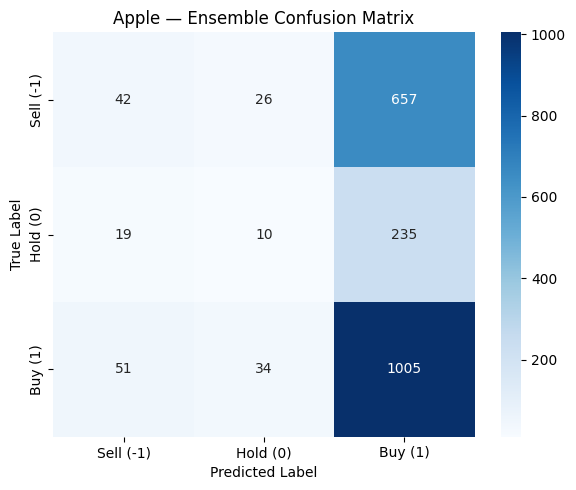


Classification Report for Apple:
              precision    recall  f1-score   support

   Sell (-1)       0.38      0.06      0.10       725
    Hold (0)       0.14      0.04      0.06       264
     Buy (1)       0.53      0.92      0.67      1090

    accuracy                           0.51      2079
   macro avg       0.35      0.34      0.28      2079
weighted avg       0.43      0.51      0.40      2079



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:50:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


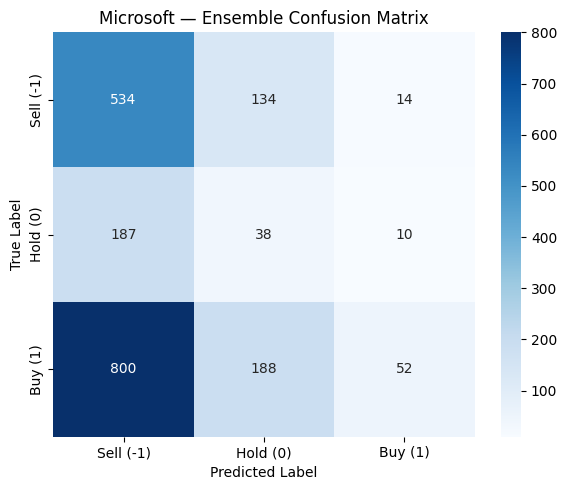


Classification Report for Microsoft:
              precision    recall  f1-score   support

   Sell (-1)       0.35      0.78      0.48       682
    Hold (0)       0.11      0.16      0.13       235
     Buy (1)       0.68      0.05      0.09      1040

    accuracy                           0.32      1957
   macro avg       0.38      0.33      0.24      1957
weighted avg       0.50      0.32      0.23      1957



/tmp/ipython-input-200-3776830314.py:31: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:50:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


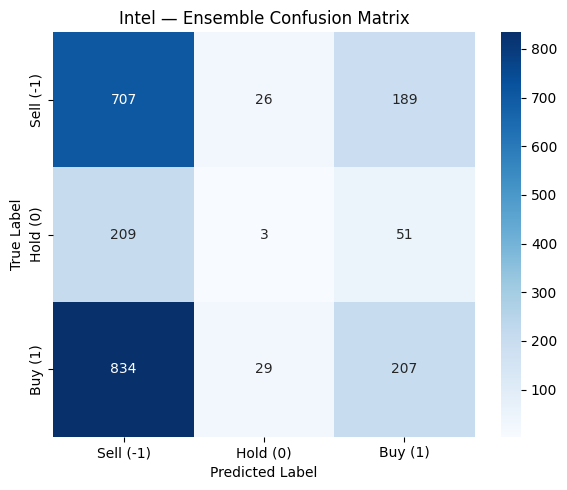


Classification Report for Intel:
              precision    recall  f1-score   support

   Sell (-1)       0.40      0.77      0.53       922
    Hold (0)       0.05      0.01      0.02       263
     Buy (1)       0.46      0.19      0.27      1070

    accuracy                           0.41      2255
   macro avg       0.31      0.32      0.27      2255
weighted avg       0.39      0.41      0.35      2255



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


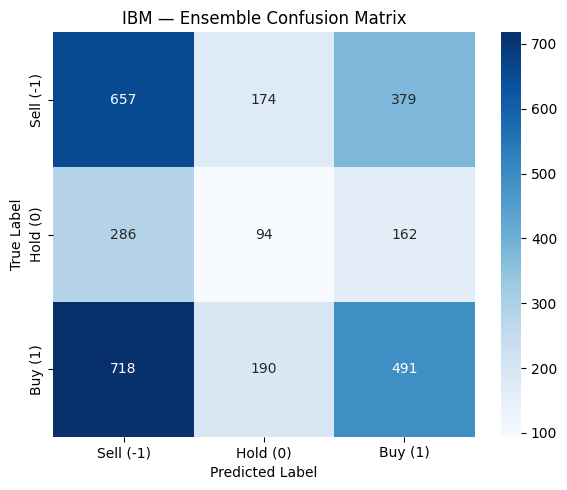


Classification Report for IBM:
              precision    recall  f1-score   support

   Sell (-1)       0.40      0.54      0.46      1210
    Hold (0)       0.21      0.17      0.19       542
     Buy (1)       0.48      0.35      0.40      1399

    accuracy                           0.39      3151
   macro avg       0.36      0.36      0.35      3151
weighted avg       0.40      0.39      0.39      3151



In [201]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def test_model(model, X_test, y_test, reverse_map, stock_name):
    y_pred = model.predict(X_test)

    y_test_original = y_test.map(reverse_map)
    y_pred_original = pd.Series(y_pred).map(reverse_map)

    cm = confusion_matrix(y_test_original, y_pred_original, labels=[-1, 0, 1])
    labels = ['Sell (-1)', 'Hold (0)', 'Buy (1)']

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{stock_name} — Ensemble Confusion Matrix')
    plt.tight_layout()
    plt.show()

    print(f"\nClassification Report for {stock_name}:")
    print(classification_report(y_test_original, y_pred_original, target_names=labels))

# --- Load and evaluate all datasets ---
datasets = {
    'Apple': pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/AAPL.csv'),
    'Microsoft': pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/MSFT.csv'),
    'Intel': pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/INTC.csv'),
    'IBM': pd.read_csv('/content/drive/MyDrive/AI4ALL Project Datasets/IBM.csv')
}

for name, df in datasets.items():
    model, X_test, y_test, reverse_map = build_model(df)
    test_model(model, X_test, y_test, reverse_map, name)

# 4) Class Performance Across Stocks

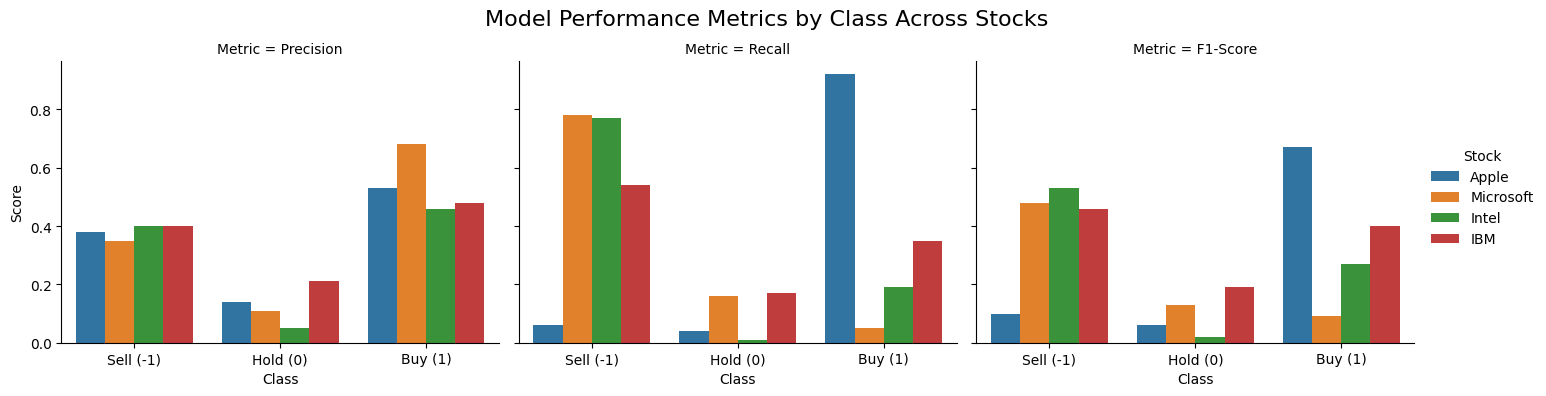

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Manually input your metrics
metrics_data = {
    'Stock': ['Apple'] * 3 + ['Microsoft'] * 3 + ['Intel'] * 3 + ['IBM'] * 3,
    'Class': ['Sell (-1)', 'Hold (0)', 'Buy (1)'] * 4,
    'Precision': [0.38, 0.14, 0.53, 0.35, 0.11, 0.68, 0.40, 0.05, 0.46, 0.40, 0.21, 0.48],
    'Recall': [0.06, 0.04, 0.92, 0.78, 0.16, 0.05, 0.77, 0.01, 0.19, 0.54, 0.17, 0.35],
    'F1-Score': [0.10, 0.06, 0.67, 0.48, 0.13, 0.09, 0.53, 0.02, 0.27, 0.46, 0.19, 0.40]
}

df_metrics = pd.DataFrame(metrics_data)

# Reshape the DataFrame for seaborn
df_melted = df_metrics.melt(id_vars=['Stock', 'Class'],
                            value_vars=['Precision', 'Recall', 'F1-Score'],
                            var_name='Metric', value_name='Score')

# Plot using catplot with bar kind
g = sns.catplot(
    data=df_melted,
    kind='bar',
    x='Class',
    y='Score',
    hue='Stock',
    col='Metric',
    height=4,
    aspect=1.2,
    errorbar=None
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Model Performance Metrics by Class Across Stocks', fontsize=16)

plt.show()

The bar chart visualization reveals significant differences in model performance across stocks and classes.

For the "Buy (1)" class, Apple achieves the highest precision (0.53) and an exceptionally high recall (0.92), indicating the model is highly sensitive to buy signals for Apple but may overpredict them.

In contrast, Microsoft’s model shows high precision for "Buy" (0.68) but extremely low recall (0.05), meaning it predicts buys accurately but rarely makes those predictions.

Intel and IBM display more balanced yet moderate performance, with precision and recall in the 0.4–0.5 range for the "Sell" and "Buy" classes, while all models perform poorly on the "Hold (0)" class, showing universally low precision, recall, and F1-scores.

These results suggest the model struggles to distinguish hold signals, potentially due to their subtler patterns, and performs best when identifying clear upward or downward trends.